In [1]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import cv2
import statistics
import skimage as ski
from skimage.morphology import square,disk
from scipy import signal
from scipy import stats
from pathlib import Path
import hashlib
import numbers
import matplotlib.colors as mcolors

# Check for Plungers

In [5]:
files = os.listdir('/eos/experiment/awake/event_data/2025/05/23')
f = h5py.File('/eos/experiment/awake/event_data/2025/05/23/' + files[10], 'r')

In [2]:
def check_plunger_states(files, plengths=None):
    """
    Checks is plunger in the line, and which one.....
    """
    
    if plengths is None:

        plengths = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.3]
        
    results = []
    #EVENT_DATE = '2025/05/25'
    #DATA_PATH = f'/eos/experiment/awake/event_data/{EVENT_DATE}'

    for i, file_path in enumerate(files):
        #file_path = os.path.join(DATA_PATH, filename)

        plunger_state = 0
        plunger_in = None
        is_there_a_plunger = 0
 
        #print(f"{i}/{len(files)}")

        try:

            with h5py.File(file_path, 'r') as f:
                
                for p in range(len(plengths)):
                    #print(p)
                    try:
                        plunger = list(f['AwakeEventData'][f'AWAKE.XAWAV2_PE_P{p + 1}_ST']['PosSt']['value'])

                    except:
                        pass

                    else:
                        plunger_state = int(plunger[0])

                    try:
                        plunger = list(f['AwakeEventData'][f'AWAKE.XAWAV2_PG_P{p + 1}_ST']['PosSt']['value'])

                    except:
                        pass

                    else:
                        plunger_state = int(plunger[0])
                        

                    if plunger_state == 3 or plunger_state == 4:
                        plunger_in = p + 1
                        is_there_a_plunger = 1

                        break
 

        except Exception as e:

            print(f"Error reading file {file_path}: {e}")

            continue

        #print(f'Plunger?: {bool(is_there_a_plunger)}')
        #print(f"Plunger in = {plunger_in}")
 
        results.append({
            "index": i,
            "file": file_path,
            "is_there_a_plunger": bool(is_there_a_plunger),
            "plunger_in": plunger_in
        })

    return results

In [5]:
def load_all_event_data(event_filename,spectro_no,threshold):
    
    with h5py.File('/eos/experiment/awake/event_data/2025/05/17/'+ event_filename, 'r') as f:
        root = f['AwakeEventData']

        # Main data
        spectro_path = f'TCC4.SPECTRO{spectro_no}.DigiCam'
        data = root[spectro_path]['ExtractionImage']['image2D'][:]

        try:
            protons = root['TT41.BCTF.412340']['CaptureAcquisition']['totalIntensity'][0]
            
            ## sort BTV54
            screen_of_interest = root['TT41.BTV.412354.DigiCam']['ExtractionImage']['image2D'][400:610,510:720]
            bg_sensor = np.array(screen_of_interest) - 3.78126279
            w_median_filter = ski.filters.median(bg_sensor, footprint=disk(3)) 

            total_count = np.sum(w_median_filter)

            if protons !=0 and total_count > threshold:
                #print(f'[MATCH] Screen IN, protons present → {EVENT_DATE},total count: {total_count},  file {i}: {event_filename}')
                BTV54_position = 1

            else:
                BTV54_position = 0
                
                
        except(ValueError, KeyError):
            #print('error protons 1')
            protons=0
            BTV54_position = 0
        
        #try:
         #   protons2 = root['TT40.BCTFI.400344']['CaptureAcquisition']['totalIntensity'][0]
            #print(protons,protons2)
            
        #except(ValueError, KeyError):
            #print('error protons 2')
            #protons=0
        
        rif = root['Sps2AwakeSynchro']['ProtonDelayNs']['delay'][0]
        plunger_status = check_plunger_states(['/eos/experiment/awake/event_data/2025/05/17/'+ event_filename])
        
        # Screens
        screens = {
            'OTR': root['MPP-VACTRANS-OTR']['Acquisition']['end_switch_plus_active'][()],
            'CTR': root['MPP-VACTRANS-CTR']['Acquisition']['end_switch_plus_active'][()],
            'LDBP': root['LBDP2']['Acq']['position'][0],
            'BTV50': root['TT41.BTV.412350.BTVI']['SisAcquisition']['screenIn'][0],
            'BTV53': root['TT41.BTV.412353.BTVI']['SisAcquisition']['screenIn'][0],
            'BTV426': root['TT41.BTV.412426.BTVI']['SisAcquisition']['screenIn'][0],
            'BTV442': root['TT41.BTV.412442.BTVI']['SisAcquisition']['screenIn'][0],
            'Plunger': plunger_status[0]['plunger_in'],
            'BTV54': BTV54_position
        }

    return data, protons, rif, screens

In [4]:
EVENT_DATE = '2025/05/17'
DATA_PATH = f'/eos/experiment/awake/event_data/{EVENT_DATE}'
files = os.listdir(DATA_PATH)

In [39]:
for i in np.arange(0,100,1):
    load_all_event_data(files[i],1)

In [120]:
#load_all_event_data(files[20],1)

In [13]:
check_plunger_states(files)

0/2876
Plunger?: False
Plunger in = None
1/2876
Plunger?: False
Plunger in = None
2/2876
Plunger?: False
Plunger in = None
3/2876
Plunger?: False
Plunger in = None
4/2876
Plunger?: False
Plunger in = None
5/2876
Plunger?: False
Plunger in = None
6/2876
Plunger?: False
Plunger in = None
7/2876
Plunger?: False
Plunger in = None
8/2876
Plunger?: False
Plunger in = None
9/2876
Plunger?: False
Plunger in = None
10/2876
Plunger?: False
Plunger in = None
11/2876
Plunger?: False
Plunger in = None
12/2876
Plunger?: False
Plunger in = None
13/2876
Plunger?: False
Plunger in = None
14/2876
Plunger?: False
Plunger in = None
15/2876
Plunger?: False
Plunger in = None
16/2876
Plunger?: False
Plunger in = None
17/2876
Plunger?: False
Plunger in = None
18/2876
Plunger?: False
Plunger in = None
19/2876
Plunger?: False
Plunger in = None
20/2876
Plunger?: False
Plunger in = None
21/2876
Plunger?: False
Plunger in = None
22/2876
Plunger?: False
Plunger in = None
23/2876
Plunger?: False
Plunger in = None
24

Plunger?: False
Plunger in = None
201/2876
Plunger?: False
Plunger in = None
202/2876
Plunger?: False
Plunger in = None
203/2876
Plunger?: False
Plunger in = None
204/2876
Plunger?: False
Plunger in = None
205/2876
Plunger?: False
Plunger in = None
206/2876
Plunger?: False
Plunger in = None
207/2876
Plunger?: False
Plunger in = None
208/2876
Plunger?: False
Plunger in = None
209/2876
Plunger?: False
Plunger in = None
210/2876
Plunger?: False
Plunger in = None
211/2876
Plunger?: False
Plunger in = None
212/2876
Plunger?: False
Plunger in = None
213/2876
Plunger?: True
Plunger in = 2
214/2876
Plunger?: True
Plunger in = 2
215/2876
Plunger?: False
Plunger in = None
216/2876
Plunger?: False
Plunger in = None
217/2876
Plunger?: False
Plunger in = None
218/2876
Plunger?: False
Plunger in = None
219/2876
Plunger?: True
Plunger in = 2
220/2876
Plunger?: True
Plunger in = 2
221/2876
Plunger?: True
Plunger in = 2
222/2876
Plunger?: True
Plunger in = 2
223/2876
Plunger?: True
Plunger in = 2
224/2

Plunger?: False
Plunger in = None
398/2876
Plunger?: False
Plunger in = None
399/2876
Plunger?: False
Plunger in = None
400/2876
Plunger?: False
Plunger in = None
401/2876
Plunger?: False
Plunger in = None
402/2876
Plunger?: False
Plunger in = None
403/2876
Plunger?: False
Plunger in = None
404/2876
Plunger?: False
Plunger in = None
405/2876
Plunger?: False
Plunger in = None
406/2876
Plunger?: False
Plunger in = None
407/2876
Plunger?: False
Plunger in = None
408/2876
Plunger?: False
Plunger in = None
409/2876
Plunger?: False
Plunger in = None
410/2876
Plunger?: False
Plunger in = None
411/2876
Plunger?: False
Plunger in = None
412/2876
Plunger?: False
Plunger in = None
413/2876
Plunger?: False
Plunger in = None
414/2876
Plunger?: False
Plunger in = None
415/2876
Plunger?: False
Plunger in = None
416/2876
Plunger?: False
Plunger in = None
417/2876
Plunger?: False
Plunger in = None
418/2876
Plunger?: False
Plunger in = None
419/2876
Plunger?: False
Plunger in = None
420/2876
Plunger?: F

Plunger?: False
Plunger in = None
597/2876
Plunger?: False
Plunger in = None
598/2876
Plunger?: False
Plunger in = None
599/2876
Plunger?: False
Plunger in = None
600/2876
Plunger?: False
Plunger in = None
601/2876
Plunger?: False
Plunger in = None
602/2876
Plunger?: False
Plunger in = None
603/2876
Plunger?: False
Plunger in = None
604/2876
Plunger?: False
Plunger in = None
605/2876
Plunger?: False
Plunger in = None
606/2876
Plunger?: False
Plunger in = None
607/2876
Plunger?: False
Plunger in = None
608/2876
Plunger?: False
Plunger in = None
609/2876
Plunger?: False
Plunger in = None
610/2876
Plunger?: False
Plunger in = None
611/2876
Plunger?: False
Plunger in = None
612/2876
Plunger?: False
Plunger in = None
613/2876
Plunger?: False
Plunger in = None
614/2876
Plunger?: False
Plunger in = None
615/2876
Plunger?: False
Plunger in = None
616/2876
Plunger?: False
Plunger in = None
617/2876
Plunger?: False
Plunger in = None
618/2876
Plunger?: False
Plunger in = None
619/2876
Plunger?: F

Plunger?: False
Plunger in = None
801/2876
Plunger?: False
Plunger in = None
802/2876
Plunger?: False
Plunger in = None
803/2876
Plunger?: False
Plunger in = None
804/2876
Plunger?: False
Plunger in = None
805/2876
Plunger?: False
Plunger in = None
806/2876
Plunger?: False
Plunger in = None
807/2876
Plunger?: False
Plunger in = None
808/2876
Plunger?: False
Plunger in = None
809/2876
Plunger?: False
Plunger in = None
810/2876
Plunger?: False
Plunger in = None
811/2876
Plunger?: False
Plunger in = None
812/2876
Plunger?: False
Plunger in = None
813/2876
Plunger?: False
Plunger in = None
814/2876
Plunger?: False
Plunger in = None
815/2876
Plunger?: False
Plunger in = None
816/2876
Plunger?: False
Plunger in = None
817/2876
Plunger?: False
Plunger in = None
818/2876
Plunger?: False
Plunger in = None
819/2876
Plunger?: False
Plunger in = None
820/2876
Plunger?: False
Plunger in = None
821/2876
Plunger?: False
Plunger in = None
822/2876
Plunger?: False
Plunger in = None
823/2876
Plunger?: F

Plunger?: False
Plunger in = None
994/2876
Plunger?: False
Plunger in = None
995/2876
Plunger?: False
Plunger in = None
996/2876
Plunger?: False
Plunger in = None
997/2876
Plunger?: False
Plunger in = None
998/2876
Plunger?: False
Plunger in = None
999/2876
Plunger?: False
Plunger in = None
1000/2876
Plunger?: False
Plunger in = None
1001/2876
Plunger?: False
Plunger in = None
1002/2876
Plunger?: False
Plunger in = None
1003/2876
Plunger?: False
Plunger in = None
1004/2876
Plunger?: False
Plunger in = None
1005/2876
Plunger?: False
Plunger in = None
1006/2876
Plunger?: False
Plunger in = None
1007/2876
Plunger?: False
Plunger in = None
1008/2876
Plunger?: False
Plunger in = None
1009/2876
Plunger?: False
Plunger in = None
1010/2876
Plunger?: False
Plunger in = None
1011/2876
Plunger?: False
Plunger in = None
1012/2876
Plunger?: False
Plunger in = None
1013/2876
Plunger?: False
Plunger in = None
1014/2876
Plunger?: False
Plunger in = None
1015/2876
Plunger?: False
Plunger in = None
1016

Plunger?: True
Plunger in = 4
1184/2876
Plunger?: True
Plunger in = 4
1185/2876
Plunger?: True
Plunger in = 4
1186/2876
Plunger?: True
Plunger in = 4
1187/2876
Plunger?: True
Plunger in = 4
1188/2876
Plunger?: True
Plunger in = 4
1189/2876
Plunger?: True
Plunger in = 4
1190/2876
Plunger?: True
Plunger in = 4
1191/2876
Plunger?: True
Plunger in = 4
1192/2876
Plunger?: True
Plunger in = 4
1193/2876
Plunger?: True
Plunger in = 4
1194/2876
Plunger?: True
Plunger in = 4
1195/2876
Plunger?: True
Plunger in = 4
1196/2876
Plunger?: True
Plunger in = 4
1197/2876
Plunger?: True
Plunger in = 4
1198/2876
Plunger?: True
Plunger in = 4
1199/2876
Plunger?: True
Plunger in = 4
1200/2876
Plunger?: True
Plunger in = 4
1201/2876
Plunger?: True
Plunger in = 4
1202/2876
Plunger?: True
Plunger in = 4
1203/2876
Plunger?: True
Plunger in = 4
1204/2876
Plunger?: True
Plunger in = 4
1205/2876
Plunger?: True
Plunger in = 4
1206/2876
Plunger?: True
Plunger in = 2
1207/2876
Plunger?: True
Plunger in = 2
1208/2876


Plunger?: False
Plunger in = None
1382/2876
Plunger?: False
Plunger in = None
1383/2876
Plunger?: False
Plunger in = None
1384/2876
Plunger?: False
Plunger in = None
1385/2876
Plunger?: False
Plunger in = None
1386/2876
Plunger?: False
Plunger in = None
1387/2876
Plunger?: False
Plunger in = None
1388/2876
Plunger?: False
Plunger in = None
1389/2876
Plunger?: False
Plunger in = None
1390/2876
Plunger?: False
Plunger in = None
1391/2876
Plunger?: False
Plunger in = None
1392/2876
Plunger?: False
Plunger in = None
1393/2876
Plunger?: False
Plunger in = None
1394/2876
Plunger?: False
Plunger in = None
1395/2876
Plunger?: False
Plunger in = None
1396/2876
Plunger?: False
Plunger in = None
1397/2876
Plunger?: False
Plunger in = None
1398/2876
Plunger?: False
Plunger in = None
1399/2876
Plunger?: False
Plunger in = None
1400/2876
Plunger?: False
Plunger in = None
1401/2876
Plunger?: False
Plunger in = None
1402/2876
Plunger?: False
Plunger in = None
1403/2876
Plunger?: False
Plunger in = Non

Plunger?: False
Plunger in = None
1572/2876
Plunger?: False
Plunger in = None
1573/2876
Plunger?: False
Plunger in = None
1574/2876
Plunger?: False
Plunger in = None
1575/2876
Plunger?: False
Plunger in = None
1576/2876
Plunger?: False
Plunger in = None
1577/2876
Plunger?: False
Plunger in = None
1578/2876
Plunger?: False
Plunger in = None
1579/2876
Plunger?: False
Plunger in = None
1580/2876
Plunger?: False
Plunger in = None
1581/2876
Plunger?: False
Plunger in = None
1582/2876
Plunger?: False
Plunger in = None
1583/2876
Plunger?: False
Plunger in = None
1584/2876
Plunger?: False
Plunger in = None
1585/2876
Plunger?: False
Plunger in = None
1586/2876
Plunger?: False
Plunger in = None
1587/2876
Plunger?: False
Plunger in = None
1588/2876
Plunger?: False
Plunger in = None
1589/2876
Plunger?: False
Plunger in = None
1590/2876
Plunger?: False
Plunger in = None
1591/2876
Plunger?: False
Plunger in = None
1592/2876
Plunger?: False
Plunger in = None
1593/2876
Plunger?: False
Plunger in = Non

Plunger?: False
Plunger in = None
1763/2876
Plunger?: False
Plunger in = None
1764/2876
Plunger?: False
Plunger in = None
1765/2876
Plunger?: False
Plunger in = None
1766/2876
Plunger?: False
Plunger in = None
1767/2876
Plunger?: False
Plunger in = None
1768/2876
Plunger?: False
Plunger in = None
1769/2876
Plunger?: False
Plunger in = None
1770/2876
Plunger?: False
Plunger in = None
1771/2876
Plunger?: False
Plunger in = None
1772/2876
Plunger?: False
Plunger in = None
1773/2876
Plunger?: False
Plunger in = None
1774/2876
Plunger?: False
Plunger in = None
1775/2876
Plunger?: False
Plunger in = None
1776/2876
Plunger?: False
Plunger in = None
1777/2876
Plunger?: False
Plunger in = None
1778/2876
Plunger?: False
Plunger in = None
1779/2876
Plunger?: False
Plunger in = None
1780/2876
Plunger?: False
Plunger in = None
1781/2876
Plunger?: False
Plunger in = None
1782/2876
Plunger?: False
Plunger in = None
1783/2876
Plunger?: False
Plunger in = None
1784/2876
Plunger?: False
Plunger in = Non

Plunger?: False
Plunger in = None
1950/2876
Plunger?: False
Plunger in = None
1951/2876
Plunger?: False
Plunger in = None
1952/2876
Plunger?: False
Plunger in = None
1953/2876
Plunger?: False
Plunger in = None
1954/2876
Plunger?: False
Plunger in = None
1955/2876
Plunger?: False
Plunger in = None
1956/2876
Plunger?: False
Plunger in = None
1957/2876
Plunger?: False
Plunger in = None
1958/2876
Plunger?: False
Plunger in = None
1959/2876
Plunger?: False
Plunger in = None
1960/2876
Plunger?: False
Plunger in = None
1961/2876
Plunger?: False
Plunger in = None
1962/2876
Plunger?: False
Plunger in = None
1963/2876
Plunger?: False
Plunger in = None
1964/2876
Plunger?: False
Plunger in = None
1965/2876
Plunger?: False
Plunger in = None
1966/2876
Plunger?: False
Plunger in = None
1967/2876
Plunger?: False
Plunger in = None
1968/2876
Plunger?: False
Plunger in = None
1969/2876
Plunger?: False
Plunger in = None
1970/2876
Plunger?: False
Plunger in = None
1971/2876
Plunger?: False
Plunger in = Non

Plunger?: False
Plunger in = None
2137/2876
Plunger?: False
Plunger in = None
2138/2876
Plunger?: False
Plunger in = None
2139/2876
Plunger?: False
Plunger in = None
2140/2876
Plunger?: False
Plunger in = None
2141/2876
Plunger?: False
Plunger in = None
2142/2876
Plunger?: False
Plunger in = None
2143/2876
Plunger?: False
Plunger in = None
2144/2876
Plunger?: False
Plunger in = None
2145/2876
Plunger?: False
Plunger in = None
2146/2876
Plunger?: False
Plunger in = None
2147/2876
Plunger?: False
Plunger in = None
2148/2876
Plunger?: False
Plunger in = None
2149/2876
Plunger?: False
Plunger in = None
2150/2876
Plunger?: False
Plunger in = None
2151/2876
Plunger?: False
Plunger in = None
2152/2876
Plunger?: False
Plunger in = None
2153/2876
Plunger?: False
Plunger in = None
2154/2876
Plunger?: False
Plunger in = None
2155/2876
Plunger?: False
Plunger in = None
2156/2876
Plunger?: False
Plunger in = None
2157/2876
Plunger?: False
Plunger in = None
2158/2876
Plunger?: False
Plunger in = Non

Plunger?: False
Plunger in = None
2328/2876
Plunger?: False
Plunger in = None
2329/2876
Plunger?: False
Plunger in = None
2330/2876
Plunger?: False
Plunger in = None
2331/2876
Plunger?: False
Plunger in = None
2332/2876
Plunger?: False
Plunger in = None
2333/2876
Plunger?: False
Plunger in = None
2334/2876
Plunger?: False
Plunger in = None
2335/2876
Plunger?: False
Plunger in = None
2336/2876
Plunger?: False
Plunger in = None
2337/2876
Plunger?: False
Plunger in = None
2338/2876
Plunger?: False
Plunger in = None
2339/2876
Plunger?: False
Plunger in = None
2340/2876
Plunger?: False
Plunger in = None
2341/2876
Plunger?: False
Plunger in = None
2342/2876
Plunger?: False
Plunger in = None
2343/2876
Plunger?: False
Plunger in = None
2344/2876
Plunger?: False
Plunger in = None
2345/2876
Plunger?: False
Plunger in = None
2346/2876
Plunger?: False
Plunger in = None
2347/2876
Plunger?: False
Plunger in = None
2348/2876
Plunger?: False
Plunger in = None
2349/2876
Plunger?: False
Plunger in = Non

Plunger?: False
Plunger in = None
2519/2876
Plunger?: False
Plunger in = None
2520/2876
Plunger?: False
Plunger in = None
2521/2876
Plunger?: False
Plunger in = None
2522/2876
Plunger?: False
Plunger in = None
2523/2876
Plunger?: False
Plunger in = None
2524/2876
Plunger?: False
Plunger in = None
2525/2876
Plunger?: False
Plunger in = None
2526/2876
Plunger?: False
Plunger in = None
2527/2876
Plunger?: False
Plunger in = None
2528/2876
Plunger?: False
Plunger in = None
2529/2876
Plunger?: False
Plunger in = None
2530/2876
Plunger?: False
Plunger in = None
2531/2876
Plunger?: False
Plunger in = None
2532/2876
Plunger?: False
Plunger in = None
2533/2876
Plunger?: False
Plunger in = None
2534/2876
Plunger?: False
Plunger in = None
2535/2876
Plunger?: False
Plunger in = None
2536/2876
Plunger?: False
Plunger in = None
2537/2876
Plunger?: False
Plunger in = None
2538/2876
Plunger?: False
Plunger in = None
2539/2876
Plunger?: False
Plunger in = None
2540/2876
Plunger?: False
Plunger in = Non

Plunger?: False
Plunger in = None
2712/2876
Plunger?: False
Plunger in = None
2713/2876
Plunger?: False
Plunger in = None
2714/2876
Plunger?: False
Plunger in = None
2715/2876
Plunger?: False
Plunger in = None
2716/2876
Plunger?: False
Plunger in = None
2717/2876
Plunger?: False
Plunger in = None
2718/2876
Plunger?: False
Plunger in = None
2719/2876
Plunger?: False
Plunger in = None
2720/2876
Plunger?: False
Plunger in = None
2721/2876
Plunger?: False
Plunger in = None
2722/2876
Plunger?: False
Plunger in = None
2723/2876
Plunger?: False
Plunger in = None
2724/2876
Plunger?: False
Plunger in = None
2725/2876
Plunger?: False
Plunger in = None
2726/2876
Plunger?: False
Plunger in = None
2727/2876
Plunger?: False
Plunger in = None
2728/2876
Plunger?: False
Plunger in = None
2729/2876
Plunger?: False
Plunger in = None
2730/2876
Plunger?: False
Plunger in = None
2731/2876
Plunger?: False
Plunger in = None
2732/2876
Plunger?: False
Plunger in = None
2733/2876
Plunger?: False
Plunger in = Non

[{'index': 0,
  'file': '/eos/experiment/awake/event_data/2025/05/25/1748156098935000000_Type0_2832_1.h5',
  'is_there_a_plunger': False,
  'plunger_in': None},
 {'index': 1,
  'file': '/eos/experiment/awake/event_data/2025/05/25/1748156120535000000_Type0_2832_2.h5',
  'is_there_a_plunger': False,
  'plunger_in': None},
 {'index': 2,
  'file': '/eos/experiment/awake/event_data/2025/05/25/1748156142135000000_Type0_2832_3.h5',
  'is_there_a_plunger': False,
  'plunger_in': None},
 {'index': 3,
  'file': '/eos/experiment/awake/event_data/2025/05/25/1748156163735000000_Type0_2832_4.h5',
  'is_there_a_plunger': False,
  'plunger_in': None},
 {'index': 4,
  'file': '/eos/experiment/awake/event_data/2025/05/25/1748156185335000000_Type0_2832_5.h5',
  'is_there_a_plunger': False,
  'plunger_in': None},
 {'index': 5,
  'file': '/eos/experiment/awake/event_data/2025/05/25/1748156206935000000_Type0_2832_6.h5',
  'is_there_a_plunger': False,
  'plunger_in': None},
 {'index': 6,
  'file': '/eos/expe

# Test  Plotting

In [13]:
def get_colour_for_combination(combo):
    
    colour_list = [
        "#FFD700",
        "#3D3D3D",
        "#7FFFD4",
       "#12436D",
        "#FF0000" ,
        "#28A197",
        "#00FFFF",
        "#F46A25" ,
        "#801650",
        "#A285D1",
        "#6BACE6", # Light blue 
        "#8B0000",
        "#FF00FF",
        "#008000" ,
        "#3776ab" ,
        "#9370DB" ,
    ]

    
    hash_val = int(hashlib.md5(combo.encode()).hexdigest(), 16)
    return colour_list[hash_val % len(colour_list)]

In [6]:
list_screens = ['OTR','CTR','BTV50','BTV53', 'BTV426', 'BTV442', 'LDBP','Plunger', 'BTV54']

def plot_all_screens_per_rif(rif_data):
    for rif, data in rif_data.items():
        fig, ax = plt.subplots(figsize=(10, 6))
        plotted_labels = set()

        for i in range(len(data['fit_parameters'])):  
            active_screens = []

            # Determine which screen is active
            screen_used = None
            for screen in list_screens: 

                if screen =='LDBP':
                    val = data.get(f'LDBP_screen', None)[i]
                    if val == 0:
                        active_screens.append('LDBP')
                        
                if screen == 'Plunger':
                    val = data.get(f'Plunger_screen')[i]
                    #rint(val)
                    
                    for j in np.arange(1,11,1):
                        if val == j:
                            active_screens.append(f'Plunger{j}')
                        
                    #if val != None:    
                     #   active_screens.append('Plunger')
                
                
                else:
                    val = data.get(f'{screen}_screen',None)[i]

                    if isinstance(val, (bool, np.bool_)):
                        if val == False:
                            active_screens.append(screen)

                    elif isinstance(val, numbers.Number):
                        if float(val) == 1:
                            active_screens.append(screen)
                            #print(active_screens)

            if not active_screens:
                active_screens = ['None']

            # Create a combined label
            screen_label = '+'.join(active_screens)
            colour = get_colour_for_combination(screen_label)

            # Plot with unique legend entries
            show_label = screen_label not in plotted_labels
            ax.scatter(data['fit_parameters'][i], data['proton_count'][i], color=colour, label=screen_label if show_label else None, alpha=0.7)
            plotted_labels.add(screen_label)

        ax.set_title(f'RIF Offset = {round(rif - 1132482.599, 4)}', fontsize=16)
        ax.set_xlabel('Mean Pixel Intensity', fontsize=14)
        ax.set_ylabel('Proton Bunch Density', fontsize=14)
        ax.grid()

        ax.legend(title="Screen Active", loc='best')

        plt.tight_layout()
        plt.show()

In [84]:
EVENT_DATE = '2025/05/16'
DATA_PATH = f'/eos/experiment/awake/event_data/{EVENT_DATE}'

In [10]:
rif_data = {}
plunger_number = {}

event_files = os.listdir(DATA_PATH)
#print(event_files)

for i in np.arange(0,len(event_files),1):
    filename = event_files[i]
    
    data, protons, rif, screens = load_all_event_data(filename,spectro_no=1,threshold=1750000)

    bg_sensor = np.array(data) - 3.78126279
    w_median_filter = ski.filters.median(bg_sensor, footprint=disk(4)) 
    
    
    if rif not in rif_data:
        rif_data[rif] = {'fit_parameters': [], 'proton_count': [],'density': [], 'OTR_screen': [],'CTR_screen': [],'LDBP_screen': [],
                        'BTV50_screen': [],'BTV53_screen': [],'BTV426_screen': [], 'BTV442_screen': [], 'BTV54_screen': [], 'Plunger_screen': []}
        
    
    # Store values for the corresponding RIF
    rif_data[rif]['fit_parameters'].append(np.mean(w_median_filter))
    rif_data[rif]['proton_count'].append(protons)
    #rif_data[rif]['density'].append(density)
    
    ## Store screen positions
    rif_data[rif]['OTR_screen'].append(screens['OTR'])
    rif_data[rif]['CTR_screen'].append(screens['CTR'])
    rif_data[rif]['LDBP_screen'].append(screens['LDBP'])
    rif_data[rif]['BTV50_screen'].append(screens['BTV50'])
    rif_data[rif]['BTV53_screen'].append(screens['BTV53'])
    rif_data[rif]['BTV426_screen'].append(screens['BTV426'])
    rif_data[rif]['BTV442_screen'].append(screens['BTV442'])
    rif_data[rif]['Plunger_screen'].append(screens['Plunger'])
    rif_data[rif]['BTV54_screen'].append(screens['BTV54'])

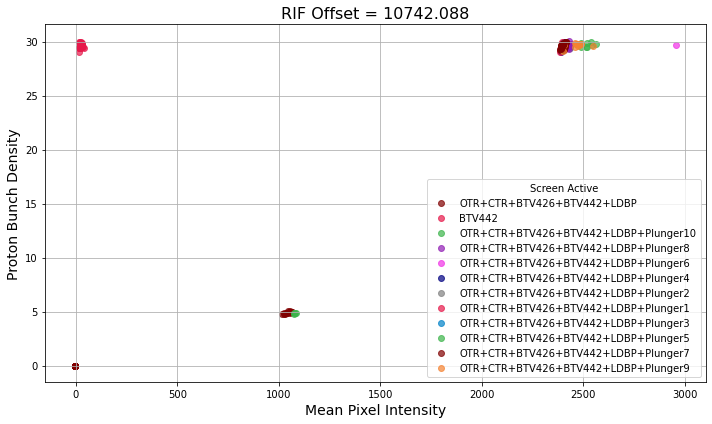

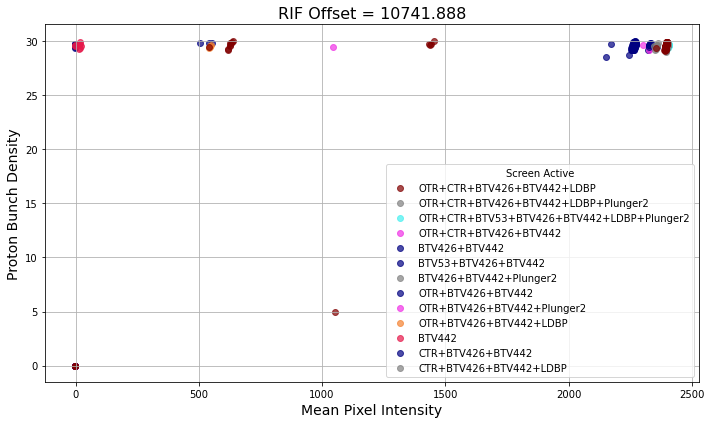

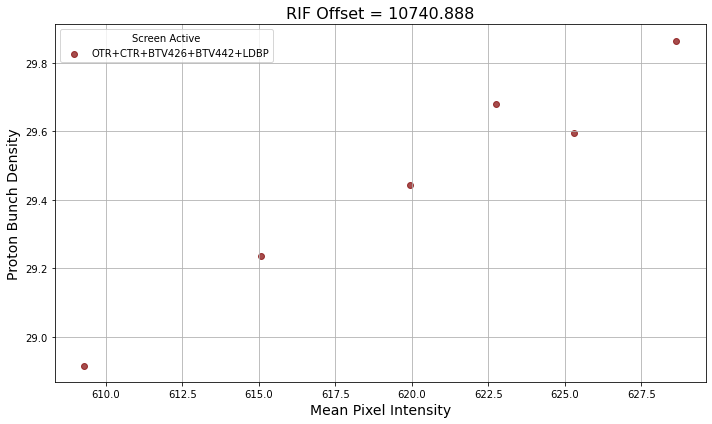

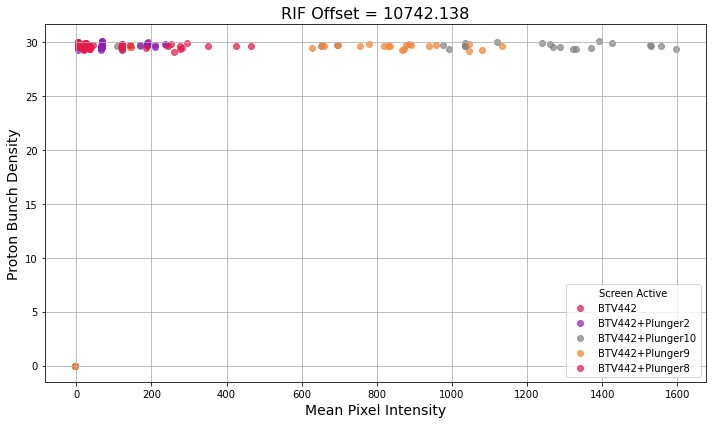

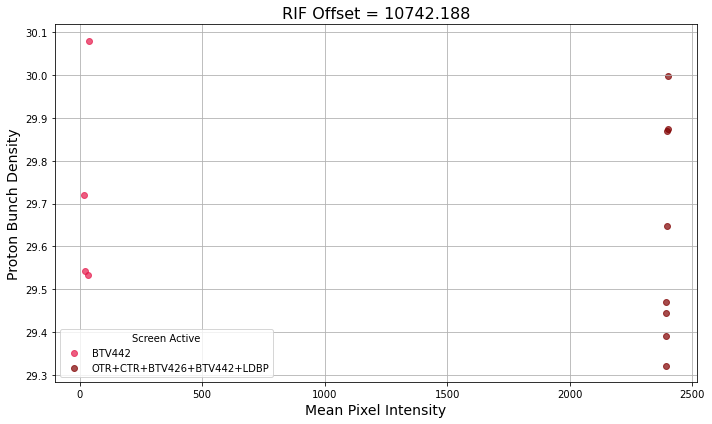

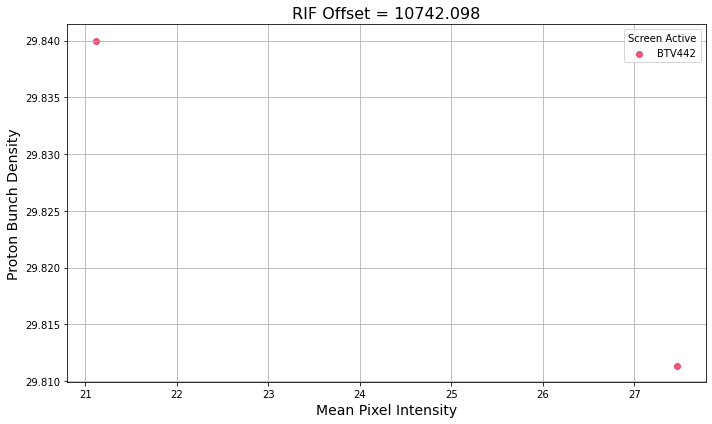

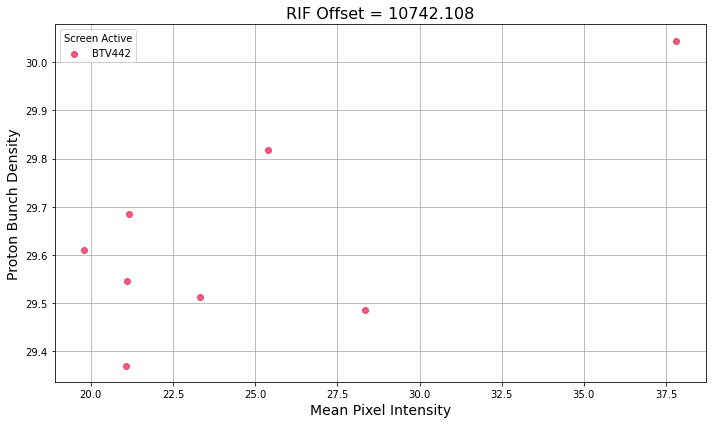

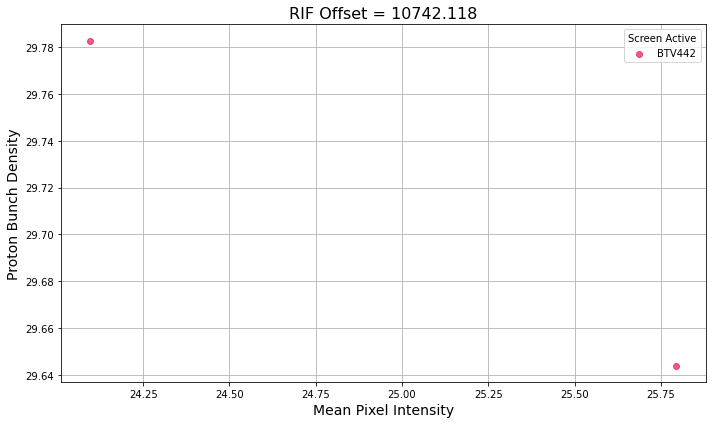

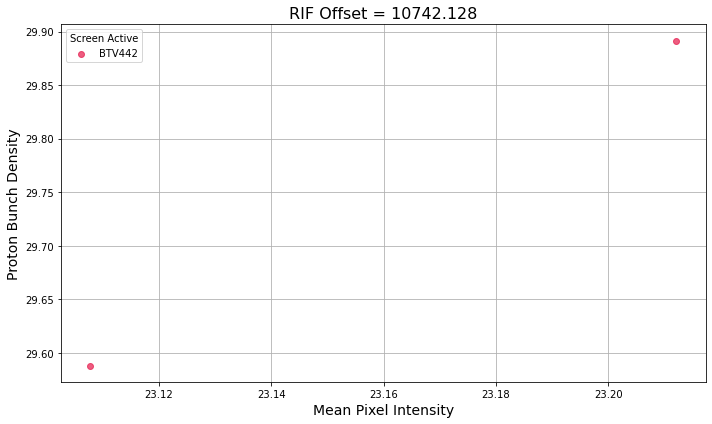

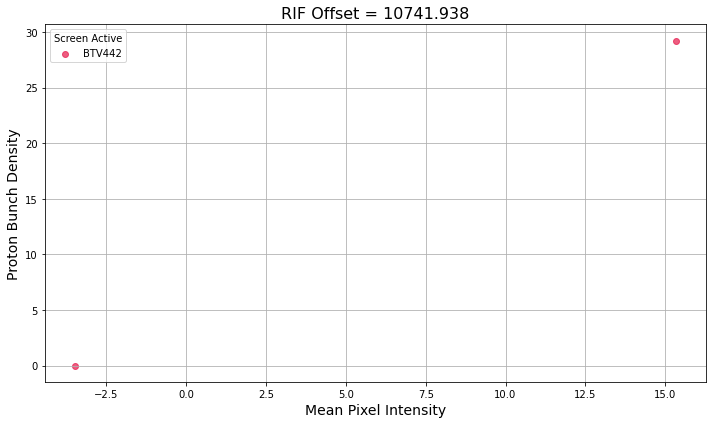

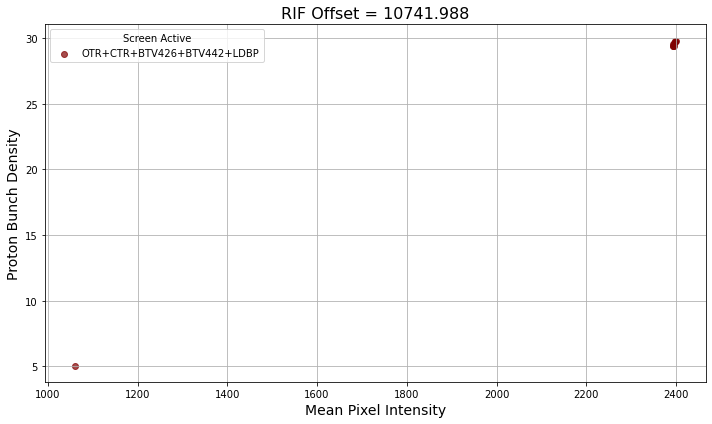

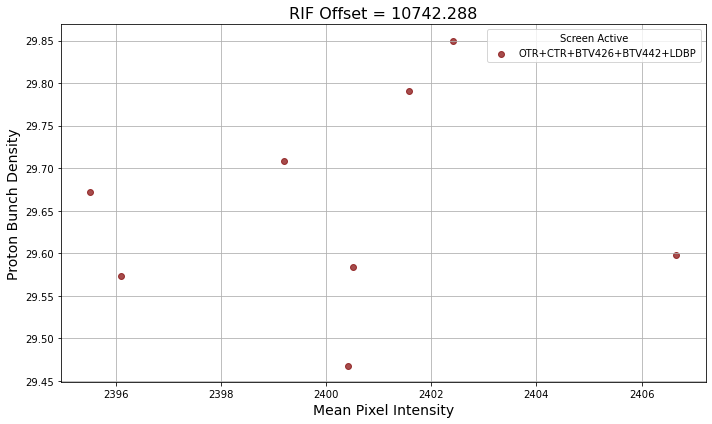

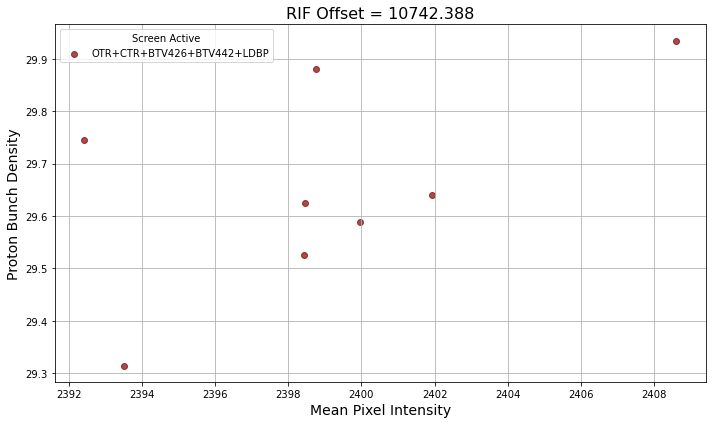

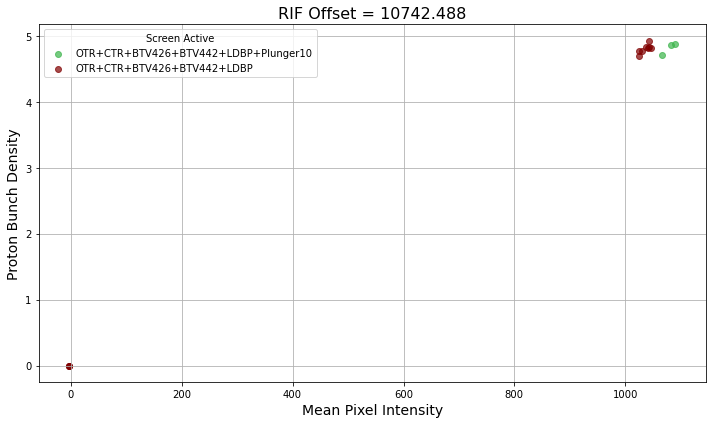

In [168]:
## rif data - 25/05/2025
plot_all_screens_per_rif(rif_data)

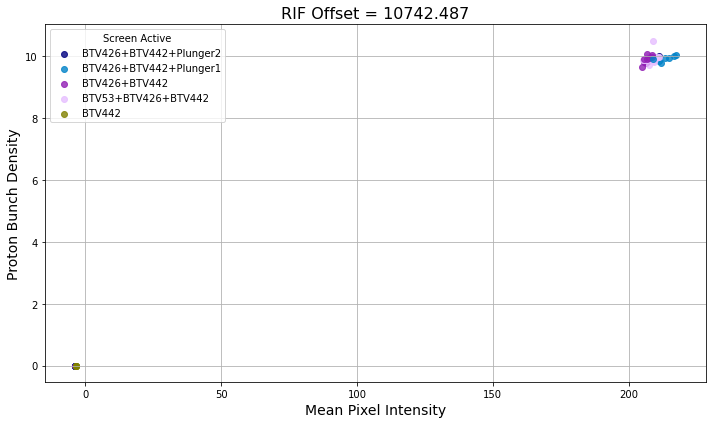

In [135]:
## rif data - 20/05/2025
## also extraction image error .....
plot_all_screens_per_rif(rif_data)

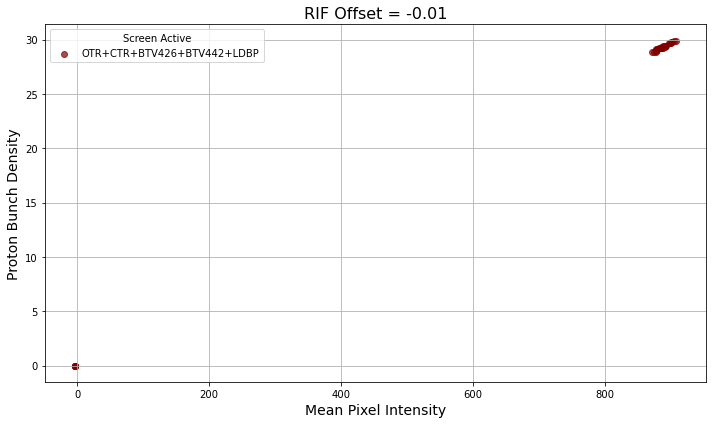

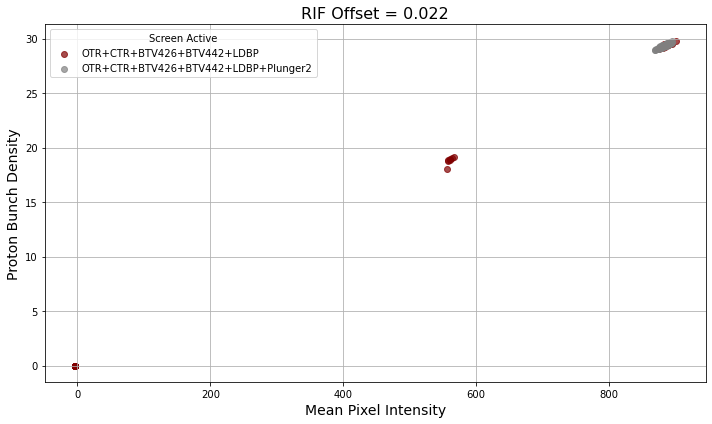

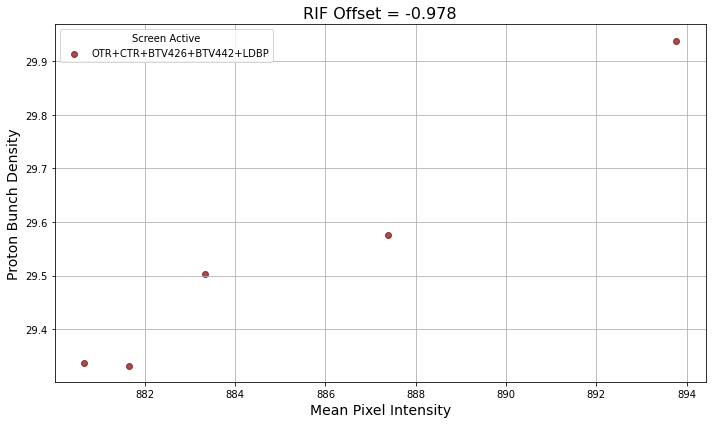

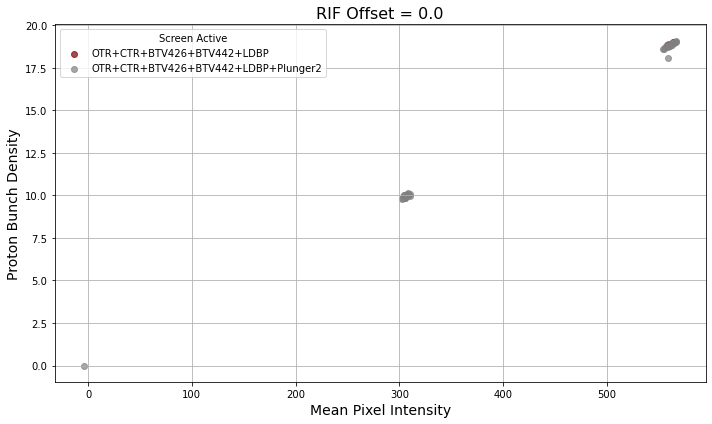

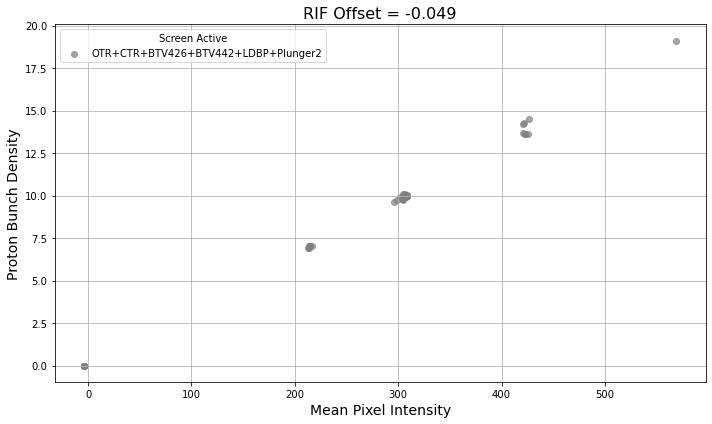

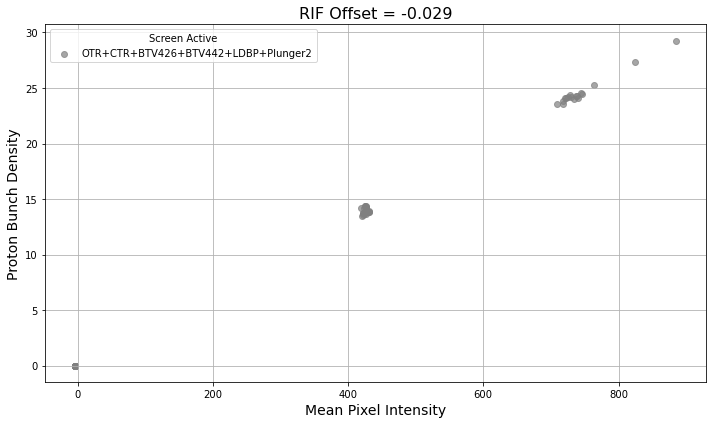

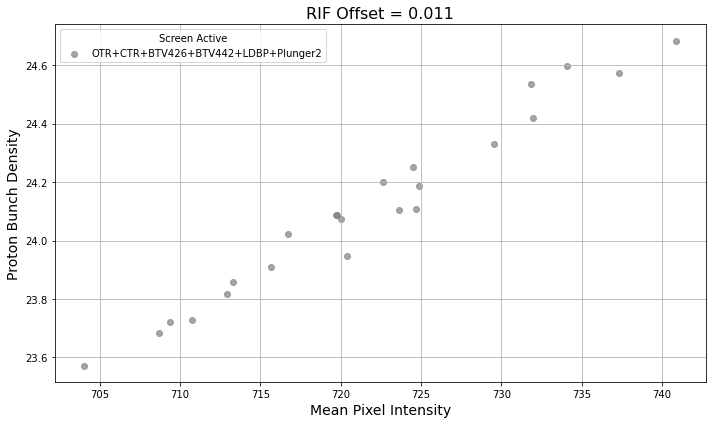

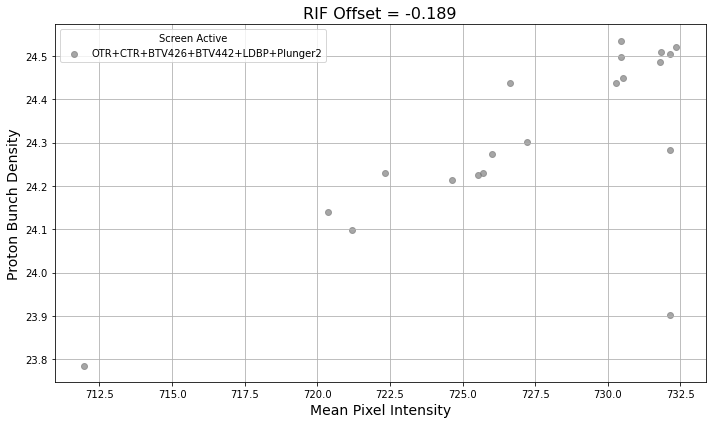

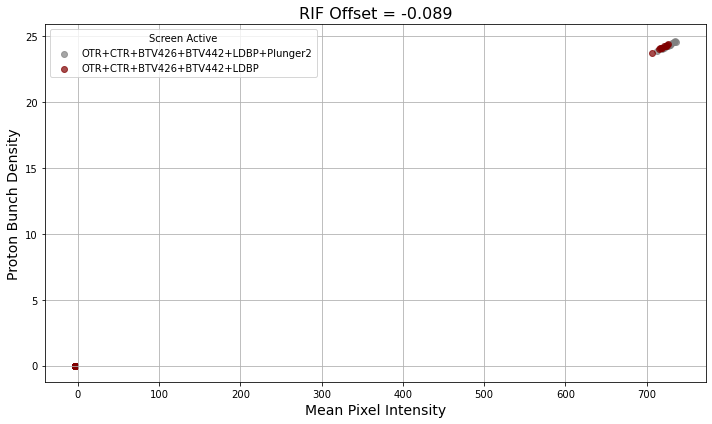

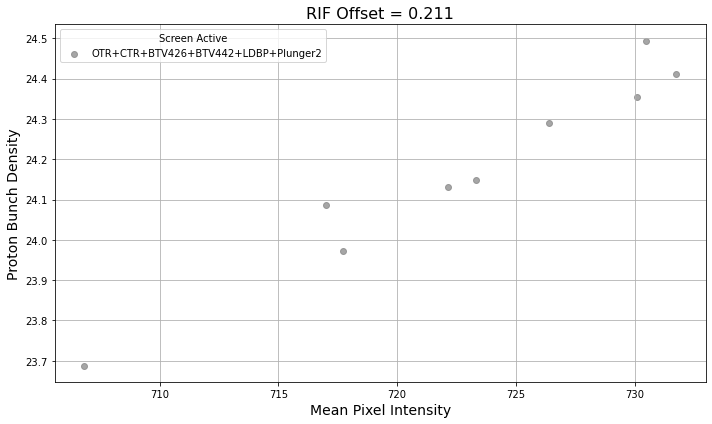

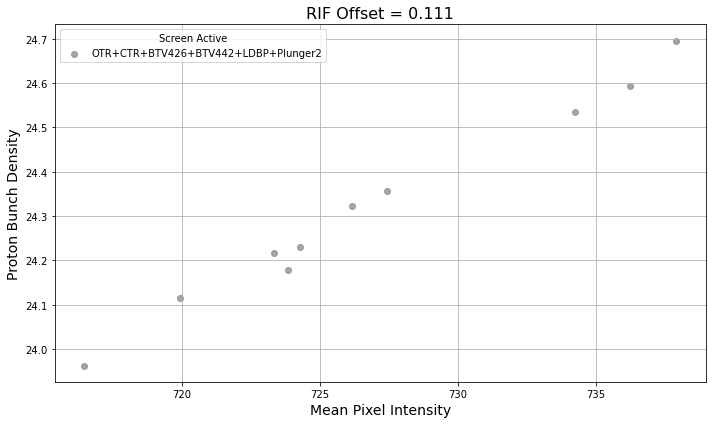

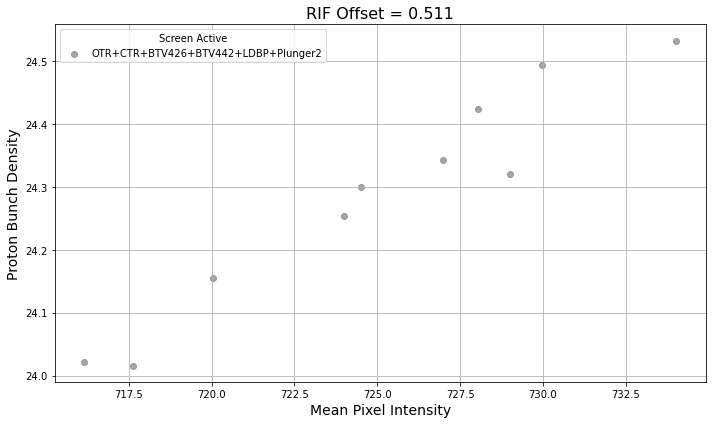

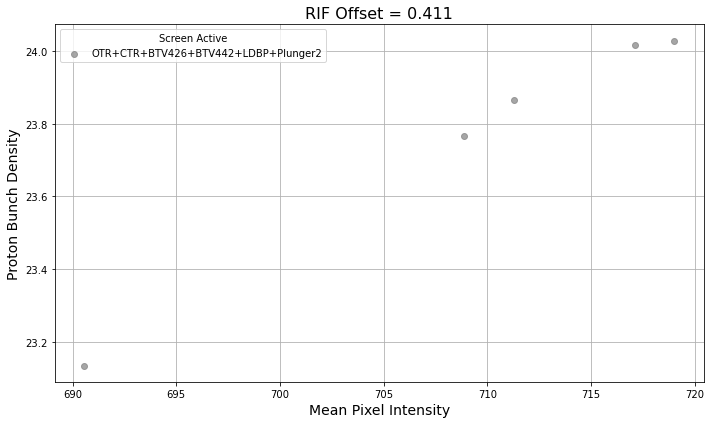

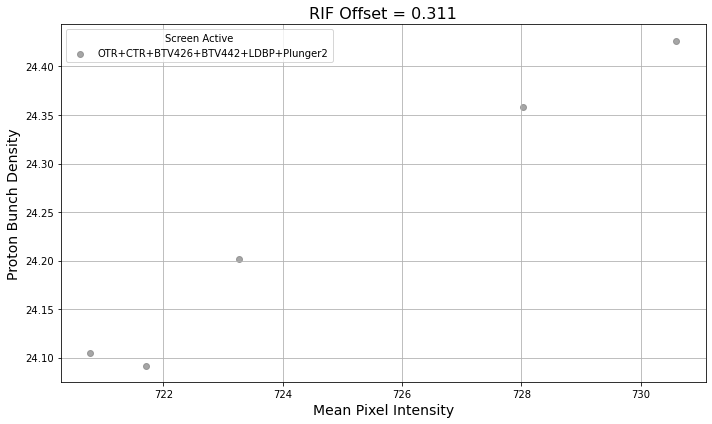

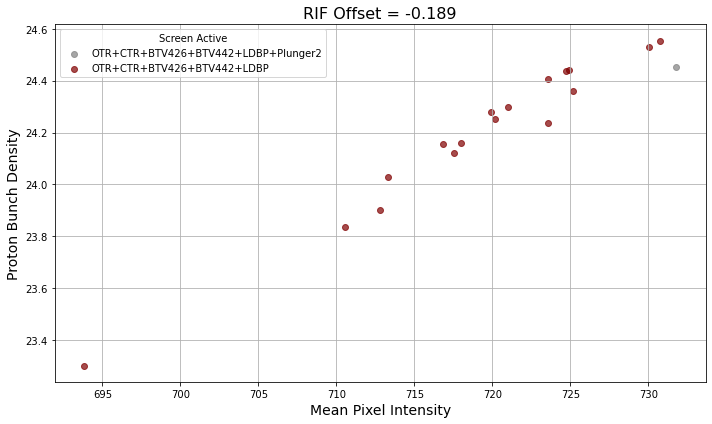

In [175]:
## rif data - 18/05/2025 (CENTRE RIF = )
plot_all_screens_per_rif(rif_data)

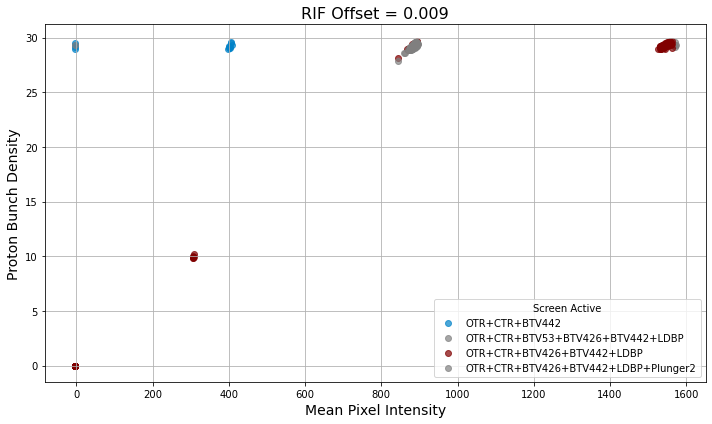

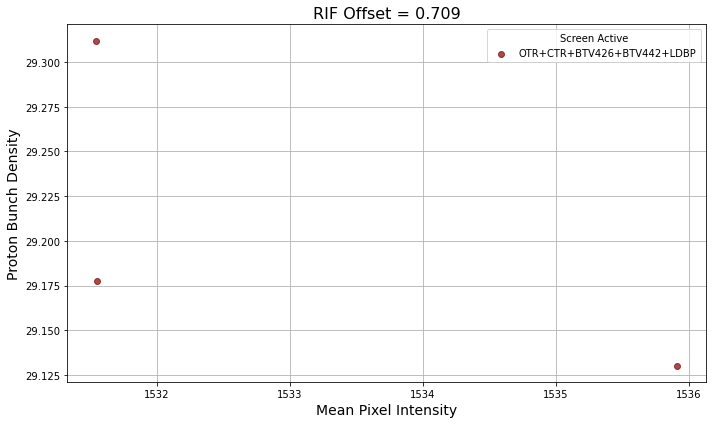

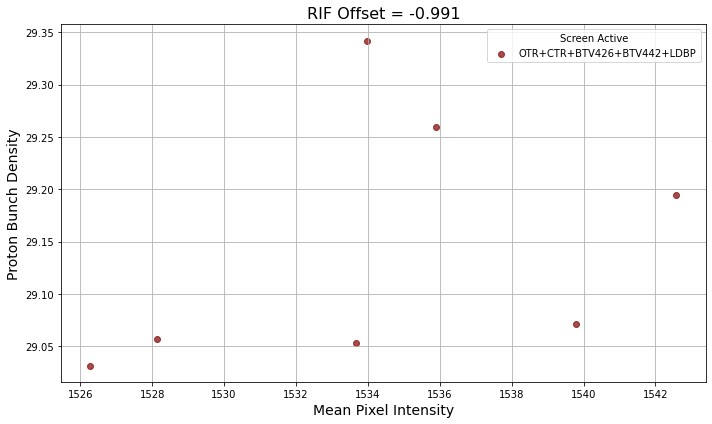

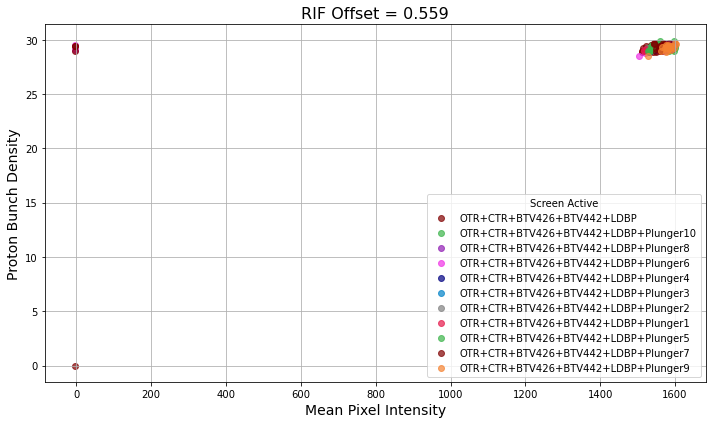

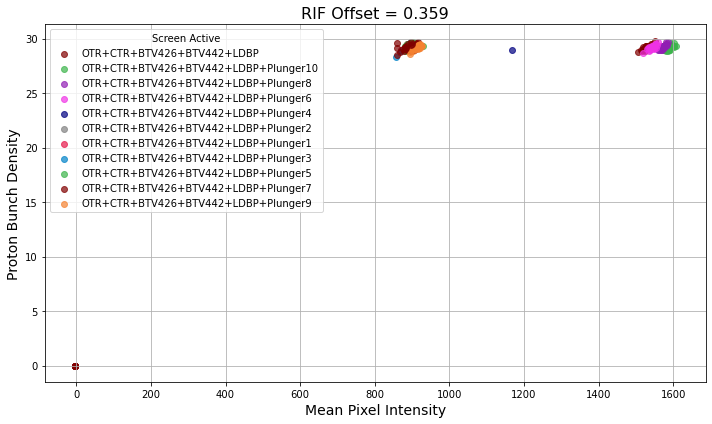

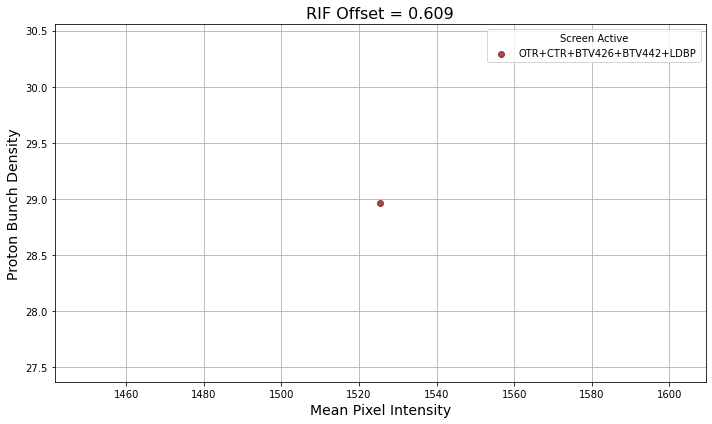

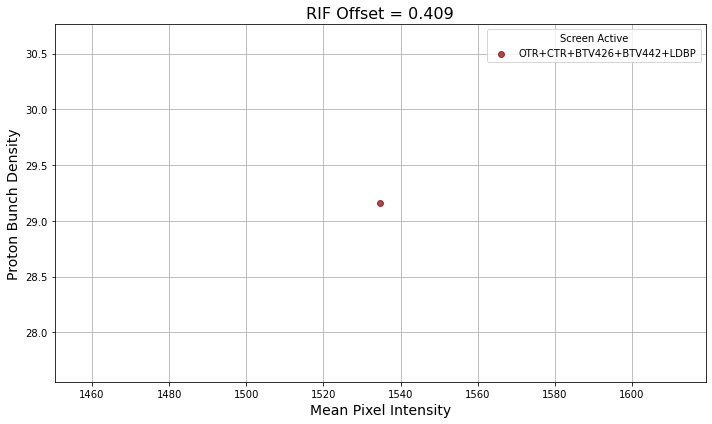

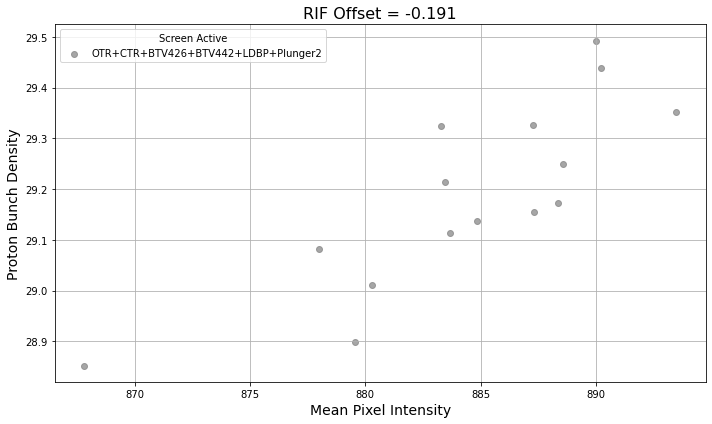

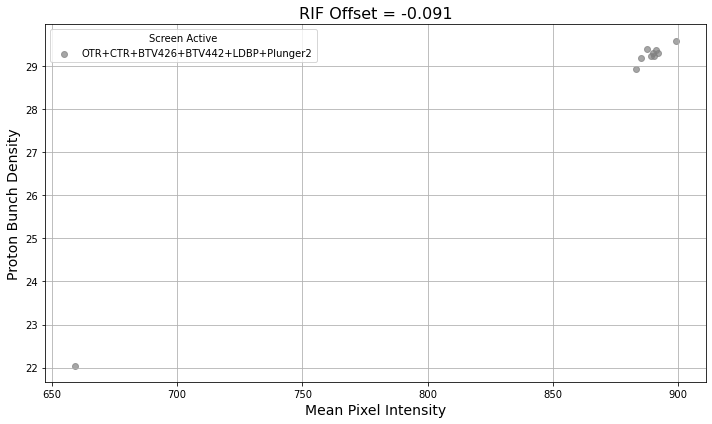

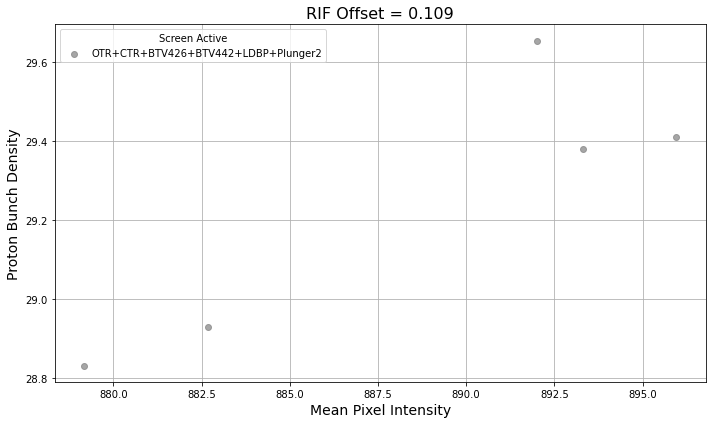

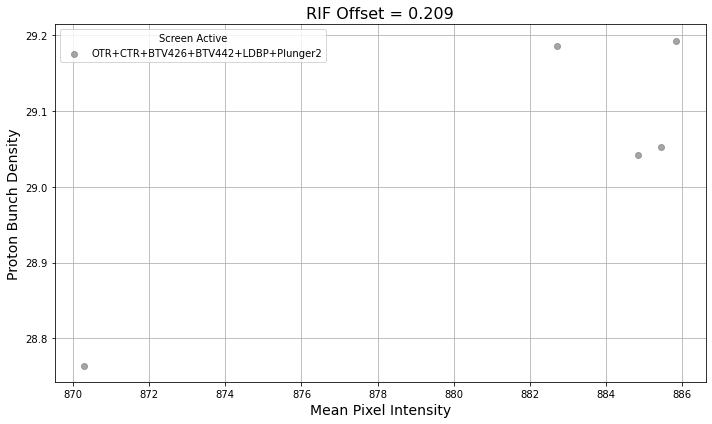

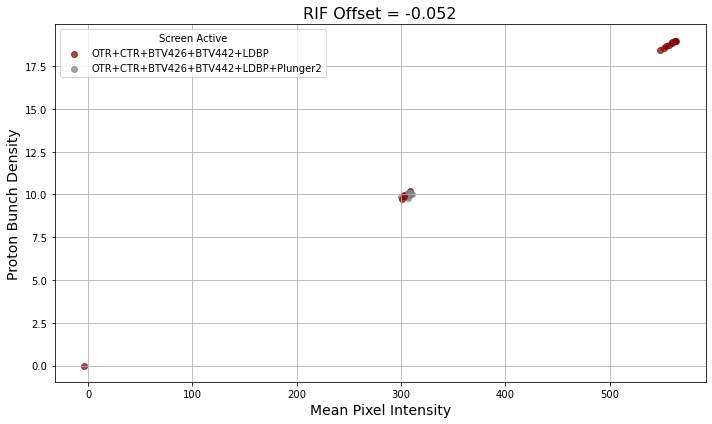

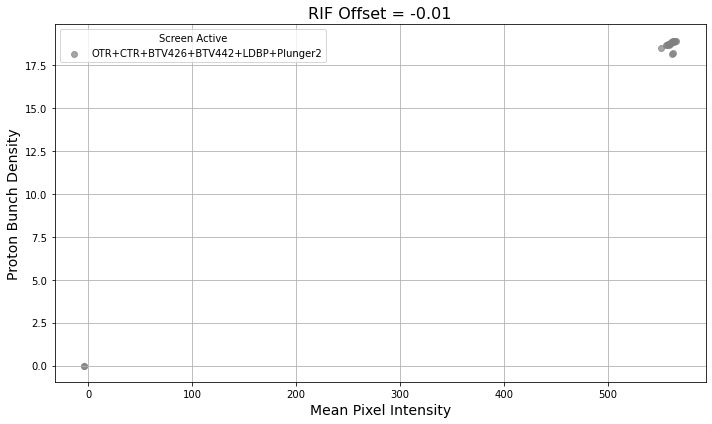

In [179]:
## rif data - 17/05/2025
plot_all_screens_per_rif(rif_data)

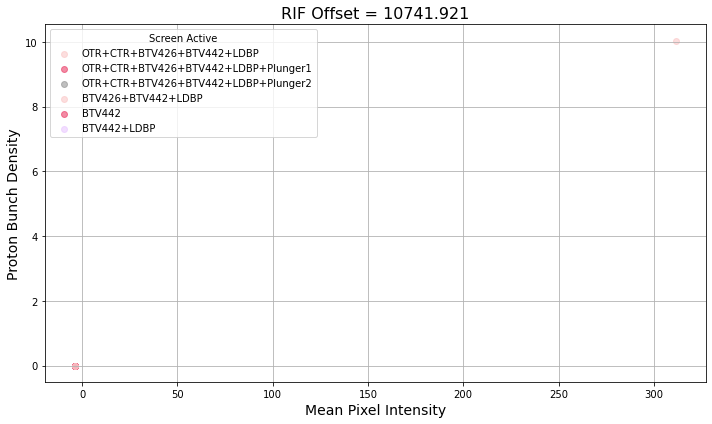

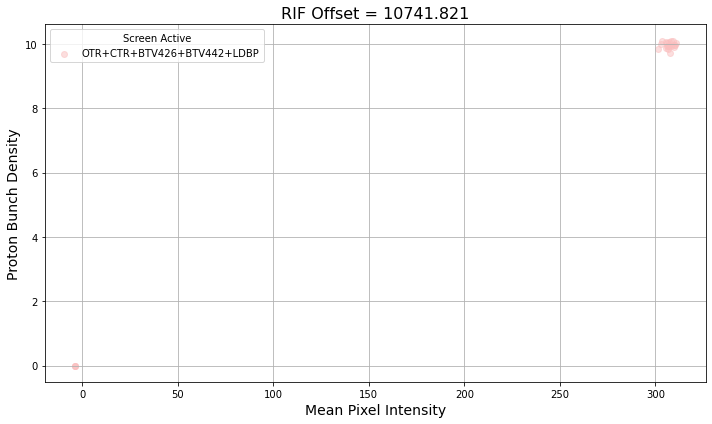

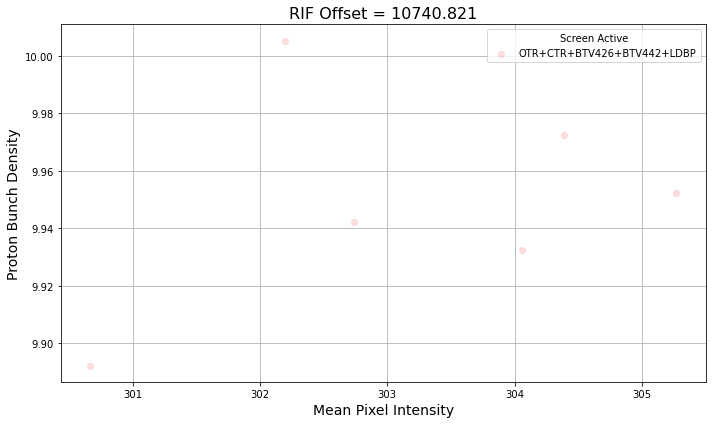

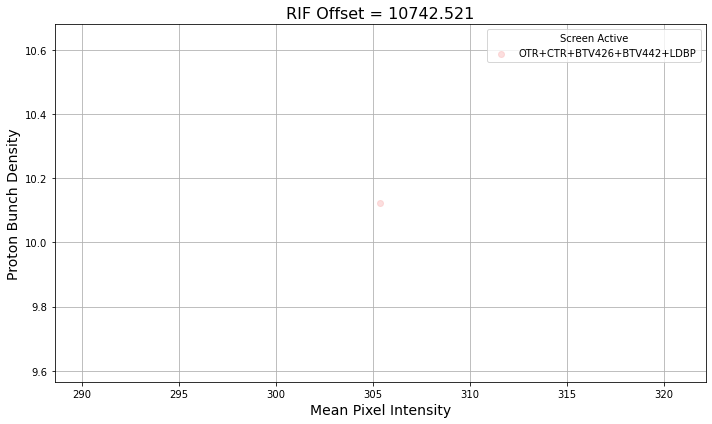

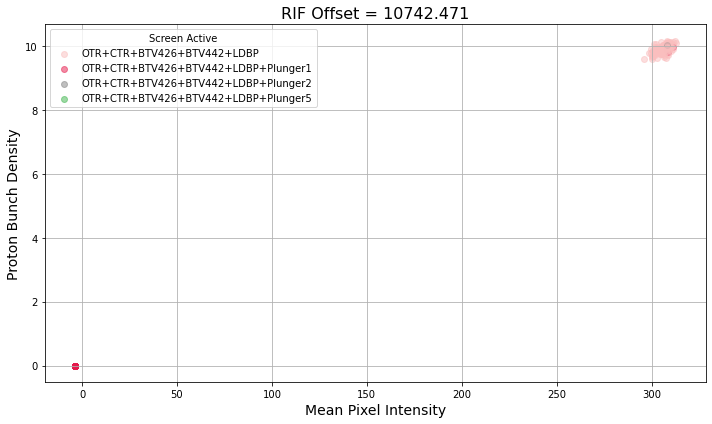

In [157]:
## rif data - 30/05/2025
plot_all_screens_per_rif(rif_data)

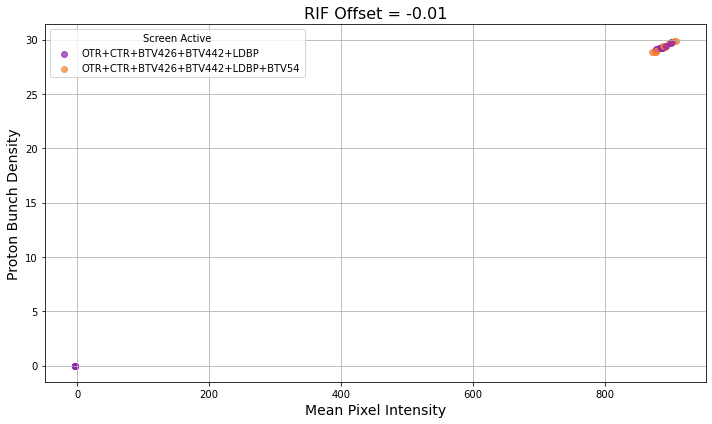

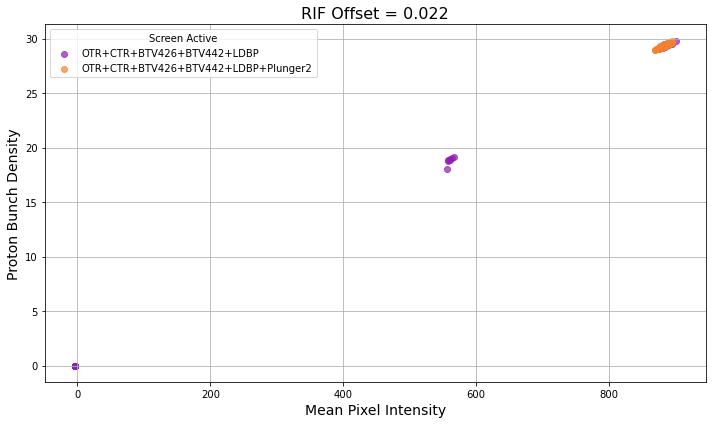

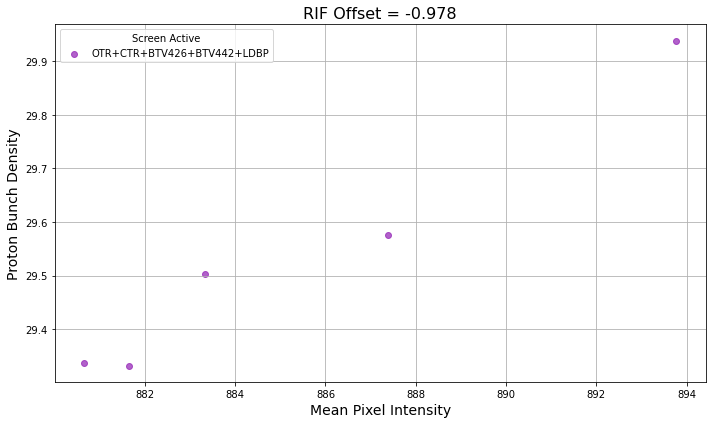

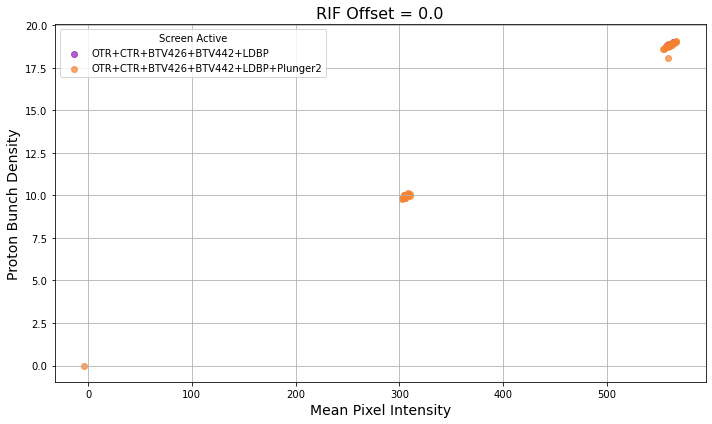

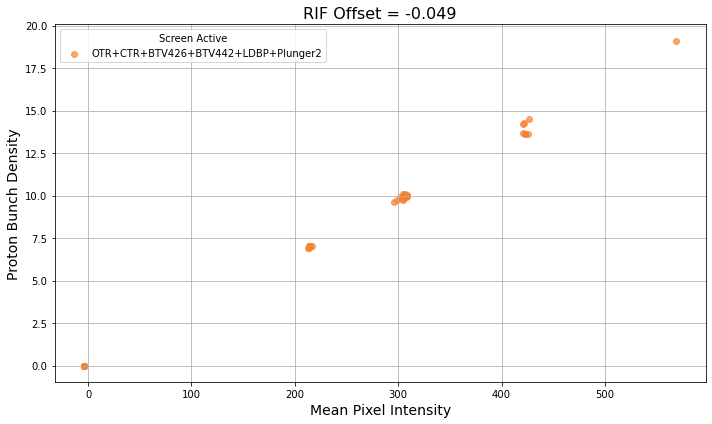

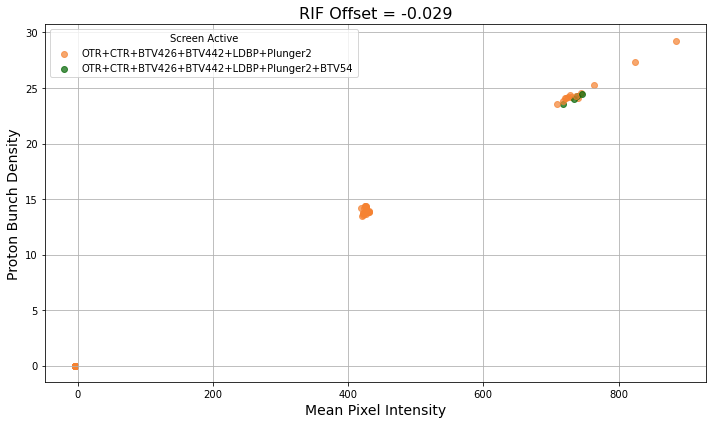

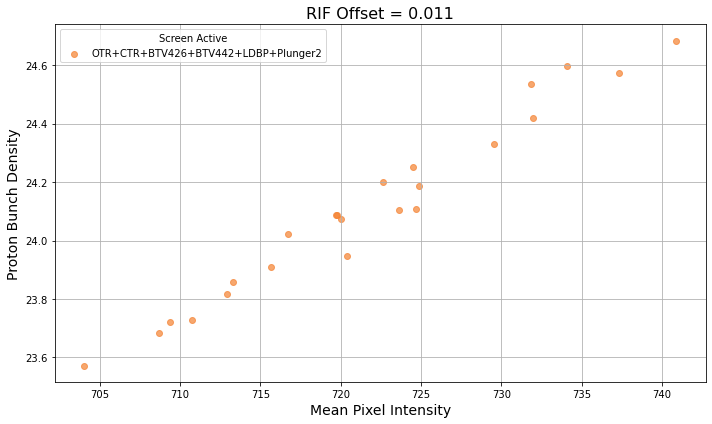

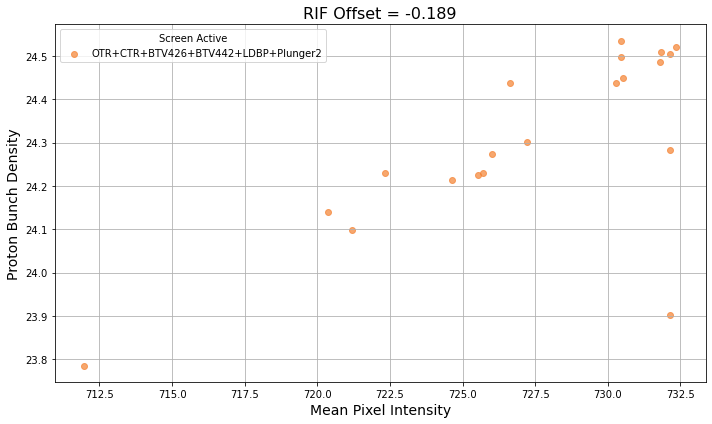

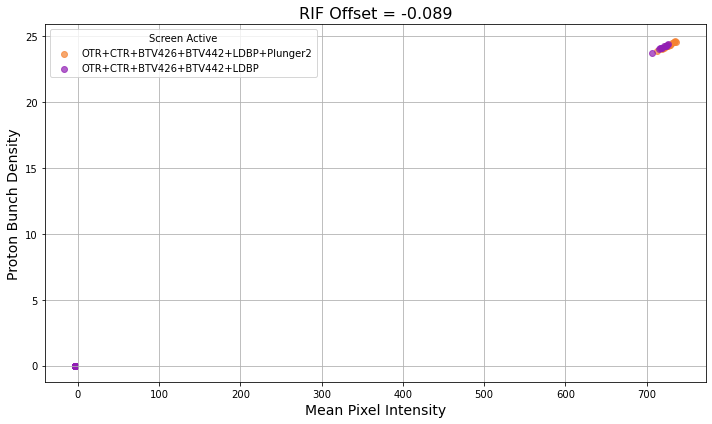

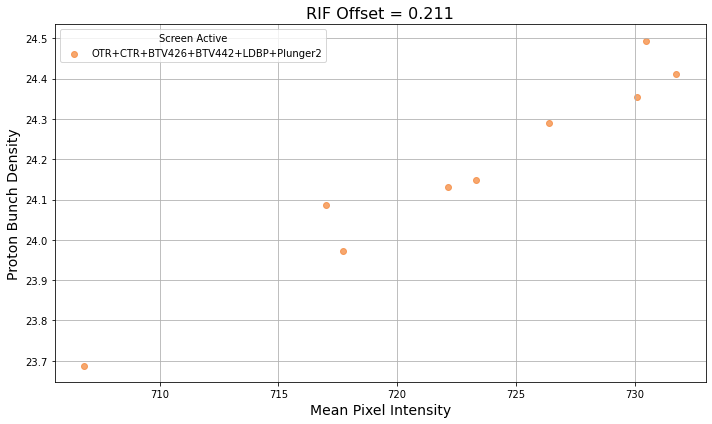

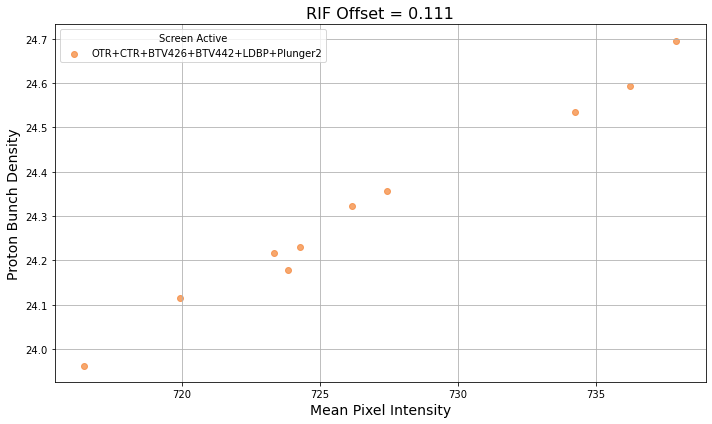

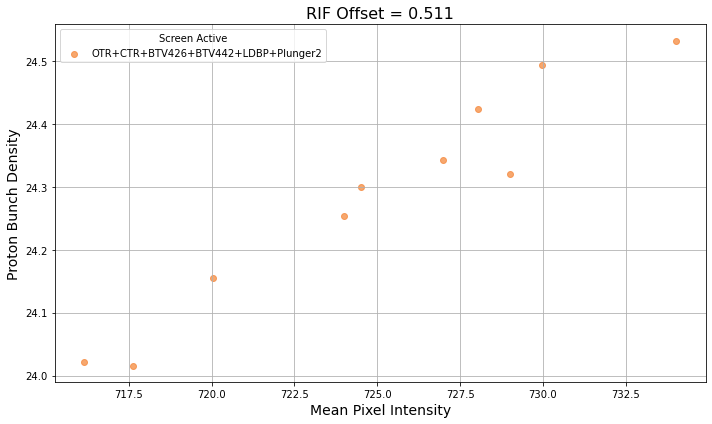

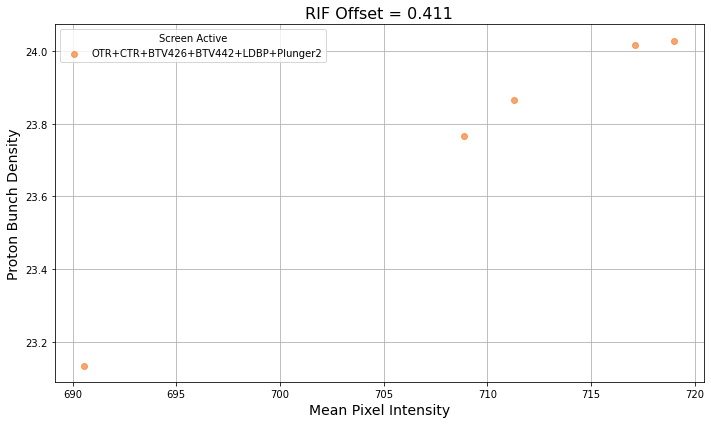

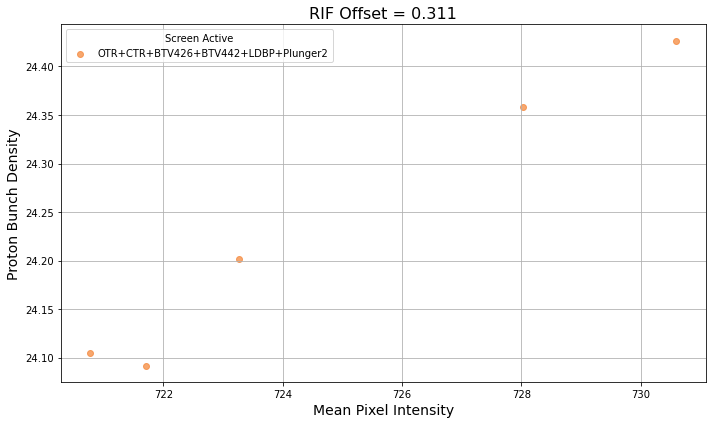

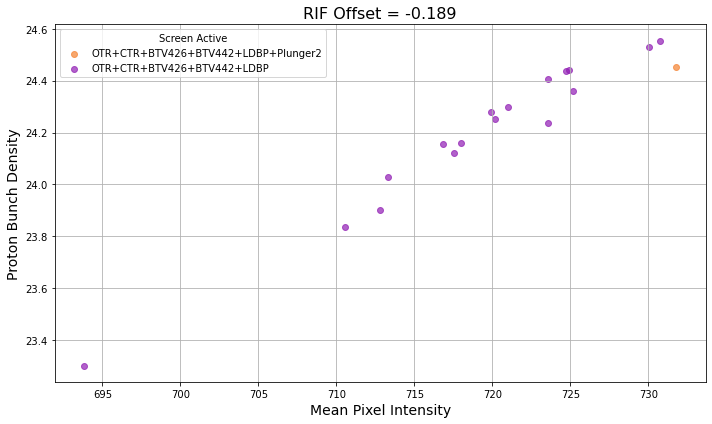

In [70]:
## rif data - 18/05/2025 (with BTV54)
plot_all_screens_per_rif(rif_data)

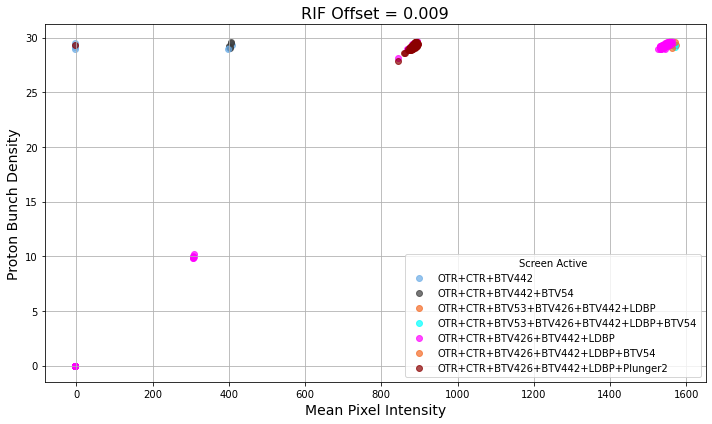

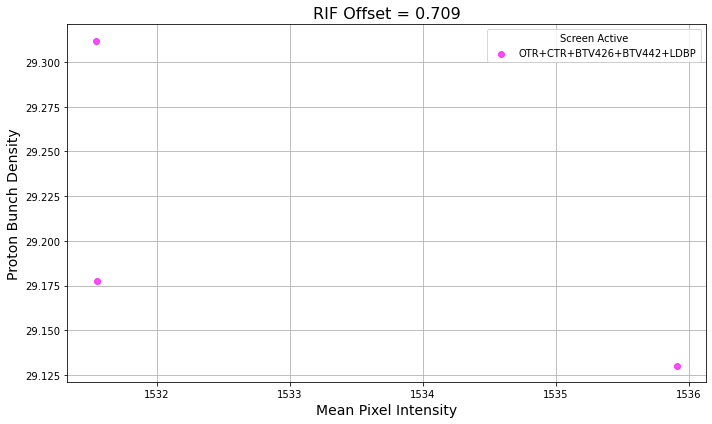

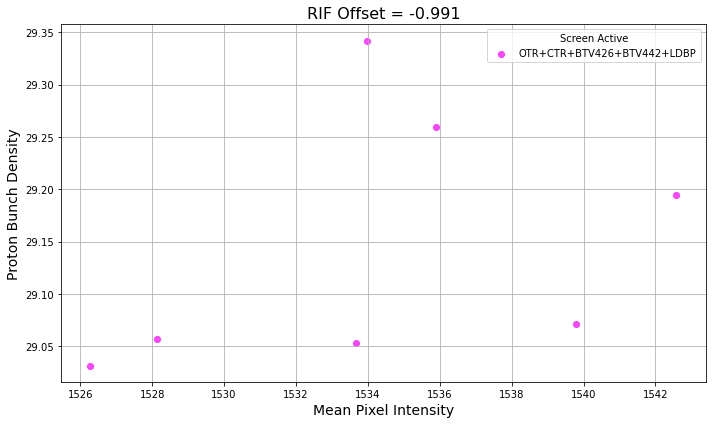

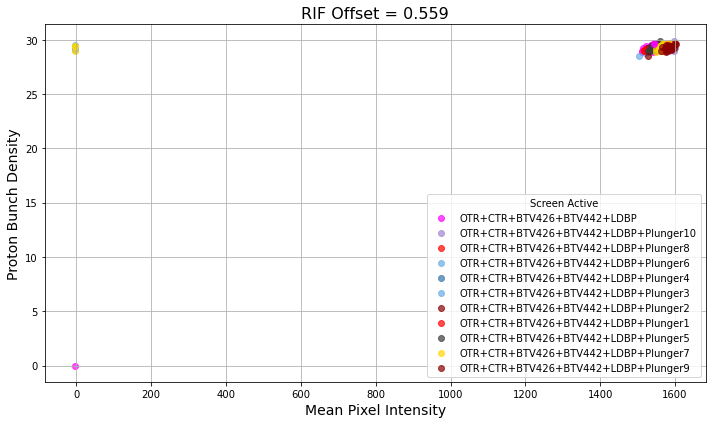

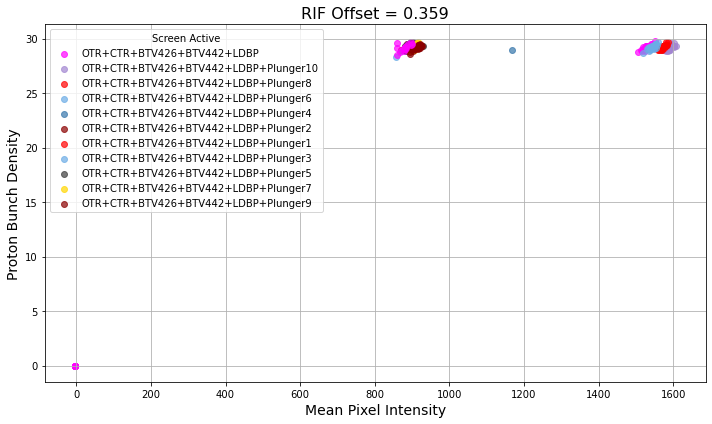

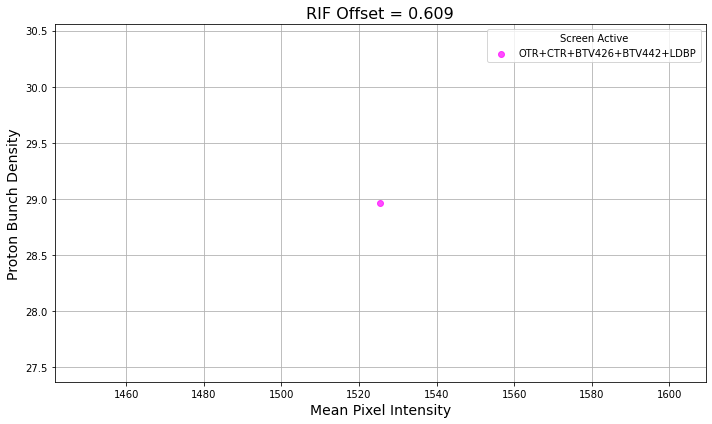

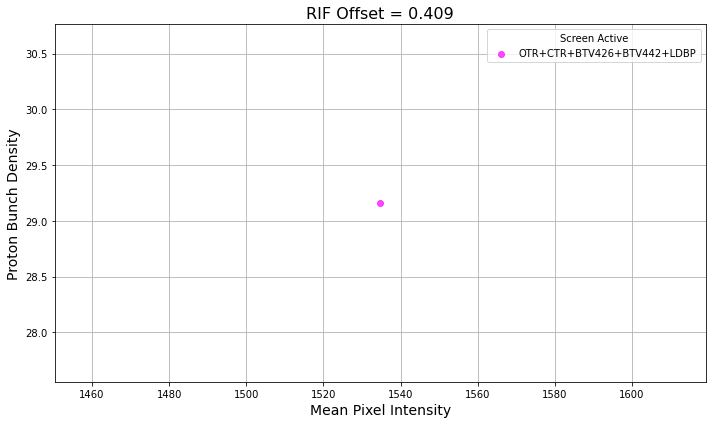

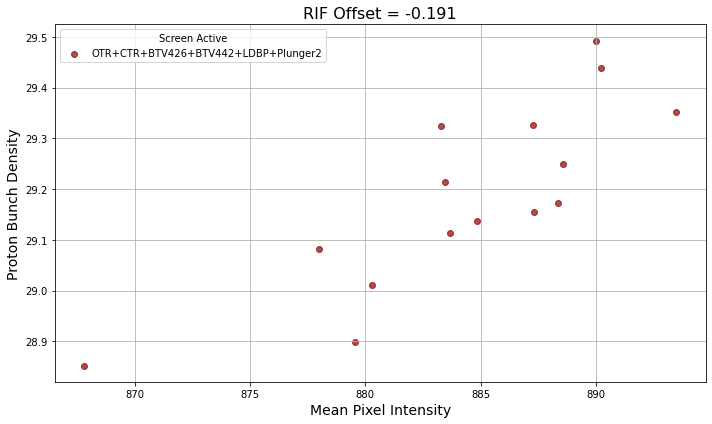

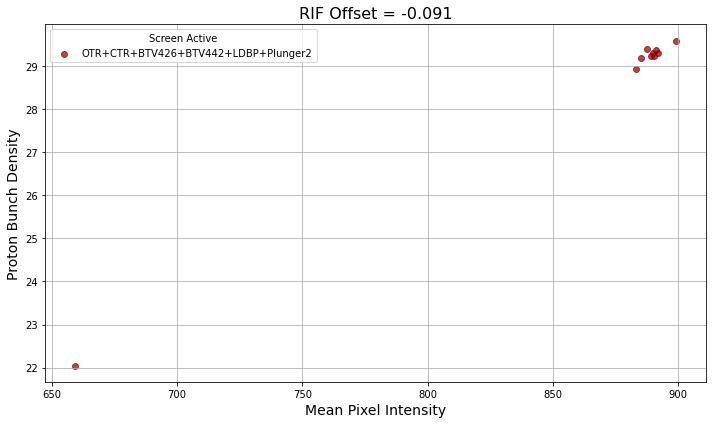

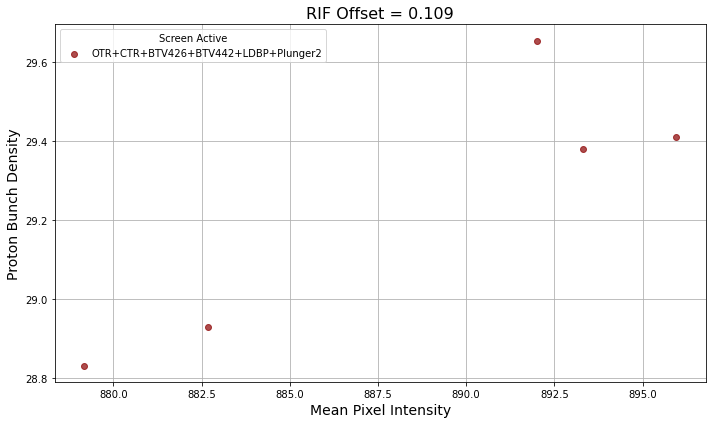

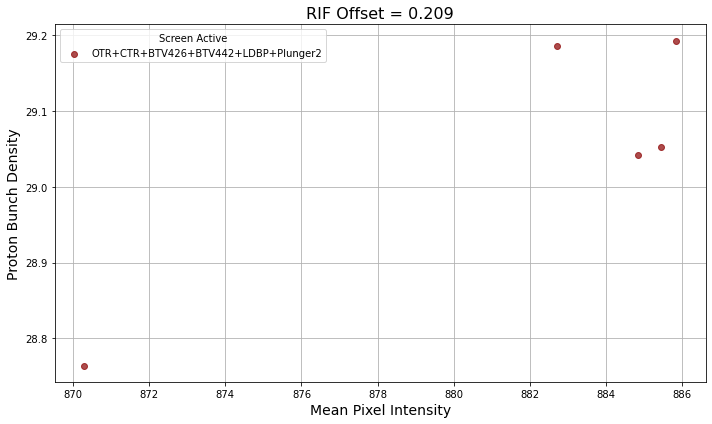

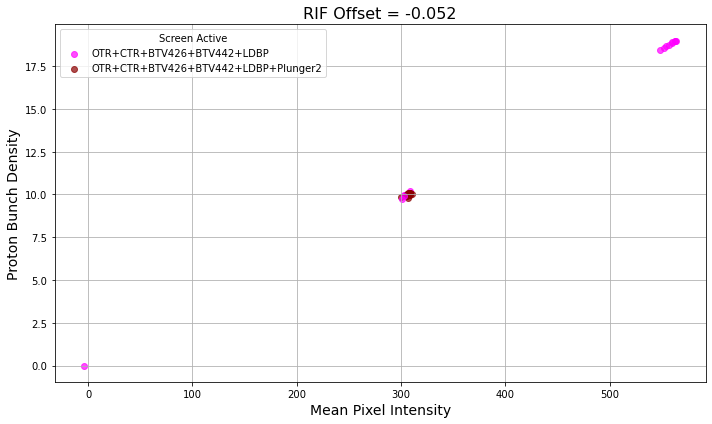

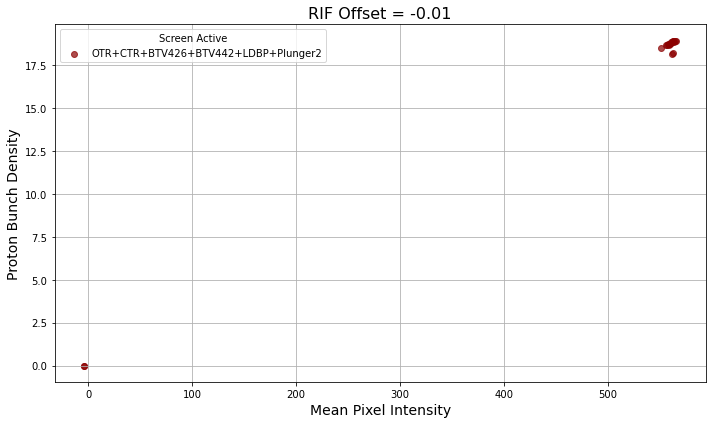

In [14]:
## rif data - 17/05/2025 (with BTV54)
plot_all_screens_per_rif(rif_data)

# BTV54 Search

In [49]:
def find_ON_screens_54(dates,screen,threshold):
    error_counter = 0
    #max_count = 0
    screen_position = []

    for EVENT_DATE in dates:

        ## set up to load data
        DATA_PATH = f'/eos/experiment/awake/event_data/{EVENT_DATE}'
        event_files = os.listdir(DATA_PATH)
        
        for i in np.arange(0,len(event_files),1):
            event_filename = event_files[i]

            with h5py.File(DATA_PATH+'/'+event_filename, 'r') as f:
                root = f['AwakeEventData']

                try:
                    protons = root['TT41.BCTF.412340']['CaptureAcquisition']['totalIntensity'][0]
                    screen_of_interest = f['AwakeEventData'][screen]['ExtractionImage']['image2D'][400:610,510:720]
                    bg_sensor = np.array(screen_of_interest) - 3.78126279
                    w_median_filter = ski.filters.median(bg_sensor, footprint=disk(4)) 

                    total_count = np.sum(w_median_filter)
                    #if total_count > max_count:
                     #   max_count = total_count
                      #  max_i = i

                    if protons !=0 and total_count > threshold:
                        print(f'[MATCH] Screen IN, protons present → {EVENT_DATE},total count: {total_count},  file {i}: {event_filename}')
                        screen_position.append(1)
                        
                    else:
                        screen_position.append(0)


                except Exception as e:
                    #print(f'[ERROR] {EVENT_DATE}, {event_filename}: {e}') 
                    #traceback.print_exc()
                    error_counter +=1
                    screen_position.append(0)

        
    return screen_position , error_counter

In [4]:
dates = []
month = '2025/05/'
files = os.listdir('/eos/experiment/awake/event_data/'+month)

for i in list(files):
    
    new_date = month + i
    dates.append(new_date)

In [50]:
find_ON_screens_54(['2025/05/18'],'TT41.BTV.412354.DigiCam',1750000)

[MATCH] Screen IN, protons present → 2025/05/18,total count: 1955266.3109609992,  file 4: 1747576394535000000_Type0_2768_5.h5
[MATCH] Screen IN, protons present → 2025/05/18,total count: 1905082.3109609992,  file 5: 1747576416135000000_Type0_2768_6.h5
[MATCH] Screen IN, protons present → 2025/05/18,total count: 1840442.3109609992,  file 6: 1747576437735000000_Type0_2768_7.h5
[MATCH] Screen IN, protons present → 2025/05/18,total count: 2163486.310960999,  file 8: 1747576480935000000_Type0_2768_9.h5
[MATCH] Screen IN, protons present → 2025/05/18,total count: 2217526.310960999,  file 10: 1747576524135000000_Type0_2768_11.h5
[MATCH] Screen IN, protons present → 2025/05/18,total count: 1803554.3109609995,  file 11: 1747576545735000000_Type0_2768_12.h5
[MATCH] Screen IN, protons present → 2025/05/18,total count: 1980822.3109609992,  file 12: 1747576567335000000_Type0_2768_13.h5
[MATCH] Screen IN, protons present → 2025/05/18,total count: 1861206.3109609992,  file 13: 1747576588935000000_Typ

([0,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,


1905240 1380926.3109609995


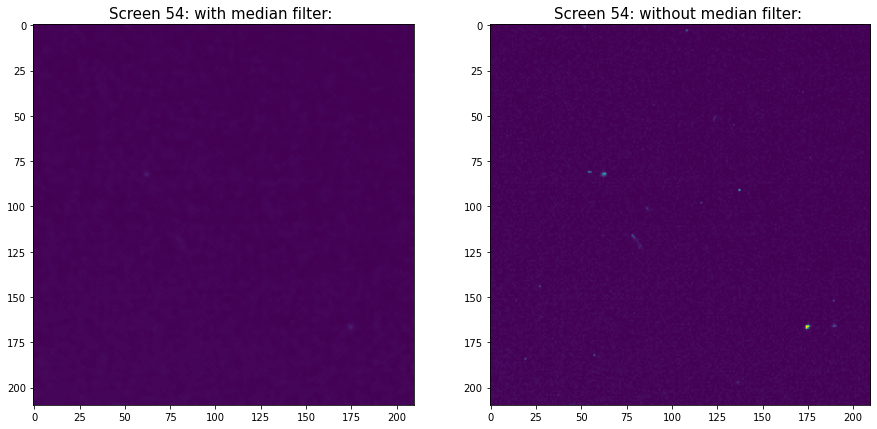

In [30]:
files = os.listdir('/eos/experiment/awake/event_data/2025/05/18')

f_20 = h5py.File('/eos/experiment/awake/event_data/2025/05/18/' + files[180], 'r')
f_23 = h5py.File('/eos/experiment/awake/event_data/2025/05/18/' + files[180], 'r')

# Extract image data
image_20 = f_20['AwakeEventData']['TT41.BTV.412354.DigiCam']['ExtractionImage']['image2D'][400:610,510:720]
image_23 = f_23['AwakeEventData']['TT41.BTV.412354.DigiCam']['ExtractionImage']['image2D'][400:610,510:720]

bg_sensor = np.array(image_23) - 3.78126279
w_median_filter = ski.filters.median(bg_sensor, footprint=disk(2)) 
print(np.sum(image_20),np.sum(w_median_filter))


#screen_status20 = f_20['AwakeEventData']['TT41.BTV.412442.BTVI']['SisAcquisition']['screenIn'][0]
#screen_status23 = f_23['AwakeEventData']['TT41.BTV.412442.BTVI']['SisAcquisition']['screenIn'][0]


fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].imshow(w_median_filter,vmax=4095)

axs[0].set_title(f'Screen 54: with median filter: ', fontsize=15)

axs[1].imshow(image_20,vmax=4095)
axs[1].set_title(f'Screen 54: without median filter: ', fontsize=15)

plt.show()